# Problem Statement:


As a real estate agent, i am helping my client who has just been relocated to other state and would like to let go his property in Ames. In order to propose a reasonable selling price to prospective seller, I am creating a Model based on the Ames Housing Dataset to predict the price of a house and also to identify what are the features that will influence price of a house in Ames.

# Executive Summary

<font color=blue> 
### Contents:
- [Import Library](#Import-Library)
- [Import Read Train CSV](#Import-and-Read-CSV-File-for-Train-Dataset)
- [EDA and Data Cleaning for Train Dataset](#EDA-and-Data-Cleaning-for-Train-Dataset)
- [Import and Read Cleaned Train and Test Dataset](#Import-and-Read-Cleaned-Train-and-Test-Dataset)
- [Create and Add New Columns for Train and Test Dataset](#Create-and-Add-New-Columns-for-Train-and-Test-Dataset)
- [Binary Category Ordinary Category Mapping for Train and Test Dataset](#Binary-Category-Ordinary-Category-Mapping-for-Train-and-Test-Dataset)
- [One-hot Encode Categorial Variables for Train and Test Dataset](#One-hot-Encode-Categorial-Variables-for-Train-and-Test-Dataset)
- [Add Interaction Term for Train and Test Dataset](#Add-Interaction-Term-for-Train-and-Test-Dataset)
- [Dealing with Outliers for Train Dataset](#Dealing-with-Outliers-for-Train-Dataset)
- [Split train_test Dataset into train_final and test_final and Export to csv](#Split-train-test-Dataset-into-train-final-and-test_final-and-Export-to-csv)
- [Feature Selection: Filtering method](#Feature-Selection:-Filtering-method)
- [Modelling with Selected Features Based on Correlation with Target](#Modelling-with-Selected-Features-Based-on-Correlation-with-Target)
- [Apply Model on Test Dataset](#Apply-Model-on-Test-Dataset)   
- [Conclusion and Recommendations](#Conclusion-and-Recommendations)   



# Import Library 

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline
from sklearn.model_selection import train_test_split,cross_val_score, cross_val_predict
from sklearn.linear_model import LinearRegression,RidgeCV, LassoCV, Ridge, Lasso,ElasticNet,ElasticNetCV
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures, StandardScaler


# Import and Read CSV File for Train Dataset

In [2]:
# import and read train csv file.
train_csv='./datasets/train.csv'
train=pd.read_csv(train_csv)

In [3]:
# Set option to view all columns
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

In [4]:
# Preview 2 rows of train dataset
train.head(2)

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,Gd,TA,CBlock,TA,TA,No,GLQ,533.0,Unf,0.0,192.0,725.0,GasA,Ex,Y,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,Gd,6,Typ,0,NaN,Attchd,1976.0,RFn,2.0,475.0,TA,TA,Y,0,44,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,Gd,TA,PConc,Gd,TA,No,GLQ,637.0,Unf,0.0,276.0,913.0,GasA,Ex,Y,SBrkr,913,1209,0,2122,1.0,0.0,2,1,4,1,Gd,8,Typ,1,TA,Attchd,1997.0,RFn,2.0,559.0,TA,TA,Y,0,74,0,0,0,0,NaN,NaN,NaN,0,4,2009,WD,220000


# EDA and Data Cleaning for Train Dataset

In [5]:
# Check the shape of data
train.shape

(2051, 81)

In [6]:
# To get descriptive statistics that summarize the central tendency, dispersion and shape of a dataset’s distribution
train.describe()

,Id,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Garage Yr Blt,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
count,2051.000000,2.051000e+03,2051.000000,1721.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2029.000000,2050.000000,2050.000000,2050.000000,2050.000000,2051.000000,2051.000000,2051.000000,2051.000000,2049.000000,2049.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,1937.000000,2050.000000,2050.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000
mean,1474.033642,7.135900e+08,57.008776,69.055200,10065.208191,6.112140,5.562165,1971.708922,1984.190151,99.695909,442.300488,47.959024,567.728293,1057.987805,1164.488055,329.329108,5.512921,1499.330083,0.427526,0.063446,1.577279,0.371039,2.843491,1.042906,6.435885,0.590931,1978.707796,1.776585,473.671707,93.833740,47.556802,22.571916,2.591419,16.511458,2.397855,51.574354,6.219893,2007.775719,181469.701609
std,843.980841,1.886918e+08,42.824223,23.260653,6742.488909,1.426271,1.104497,30.177889,21.036250,174.963129,461.204124,165.000901,444.954786,449.410704,396.446923,425.671046,51.068870,500.447829,0.522673,0.251705,0.549279,0.501043,0.826618,0.209790,1.560225,0.638516,25.441094,0.764537,215.934561,128.549416,66.747241,59.845110,25.229615,57.374204,37.782570,573.393985,2.744736,1.312014,79258.659352
min,1.000000,5.263011e+08,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1895.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000
25%,753.500000,5.284581e+08,20.000000,58.000000,7500.000000,5.000000,5.000000,1953.500000,1964.500000,0.000000,0.000000,0.000000,220.000000,793.000000,879.500000,0.000000,0.000000,1129.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,319.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129825.000000
50%,1486.000000,5.354532e+08,50.000000,68.000000,9430.000000,6.000000,5.000000,1974.000000,1993.000000,0.000000,368.000000,0.000000,474.500000,994.500000,1093.000000,0.000000,0.000000,1444.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,162500.000000
75%,2198.000000,9.071801e+08,70.000000,80.000000,11513.500000,7.000000,6.000000,2001.000000,2004.000000,161.000000,733.750000,0.000000,811.000000,1318.750000,1405.000000,692.500000,0.000000,1728.500000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,2930.000000,9.241520e+08,190.000000,313.000000,159000.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,5095.000000,1862.000000,1064.000000,5642.000000,3.000000,2.000000,4.000000,2.000000,8.000000,3.000000,15.000000,4.000000,2207.000000,5.000000,1418.000000,1424.000000,547.000000,432.000000,508.000000,490.000000,800.000000,17000.000000,12.000000,2010.000000,611657.000000


In [7]:
# Check train dataset data type and if there's any null values
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 81 columns):
Id                 2051 non-null int64
PID                2051 non-null int64
MS SubClass        2051 non-null int64
MS Zoning          2051 non-null object
Lot Frontage       1721 non-null float64
Lot Area           2051 non-null int64
Street             2051 non-null object
Alley              140 non-null object
Lot Shape          2051 non-null object
Land Contour       2051 non-null object
Utilities          2051 non-null object
Lot Config         2051 non-null object
Land Slope         2051 non-null object
Neighborhood       2051 non-null object
Condition 1        2051 non-null object
Condition 2        2051 non-null object
Bldg Type          2051 non-null object
House Style        2051 non-null object
Overall Qual       2051 non-null int64
Overall Cond       2051 non-null int64
Year Built         2051 non-null int64
Year Remod/Add     2051 non-null int64
Roof Style         20

In [8]:
# Filter column with object datatype
df_numeric = train.select_dtypes(exclude=['object'])
df_obj = train.select_dtypes(include=['object']).copy()

In [9]:
for c in df_obj.columns:
    print ("---- %s ---" % c)
    print (df_obj[c].value_counts())
    print('Unique_Value_Count: '+ str((len(df_obj[c].unique()))))

---- MS Zoning ---
RL         1598
RM          316
FV          101
C (all)      19
RH           14
A (agr)       2
I (all)       1
Name: MS Zoning, dtype: int64
Unique_Value_Count: 7
---- Street ---
Pave    2044
Grvl       7
Name: Street, dtype: int64
Unique_Value_Count: 2
---- Alley ---
Grvl    85
Pave    55
Name: Alley, dtype: int64
Unique_Value_Count: 3
---- Lot Shape ---
Reg    1295
IR1     692
IR2      55
IR3       9
Name: Lot Shape, dtype: int64
Unique_Value_Count: 4
---- Land Contour ---
Lvl    1843
HLS      85
Bnk      80
Low      43
Name: Land Contour, dtype: int64
Unique_Value_Count: 4
---- Utilities ---
AllPub    2049
NoSewr       1
NoSeWa       1
Name: Utilities, dtype: int64
Unique_Value_Count: 3
---- Lot Config ---
Inside     1503
Corner      348
CulDSac     131
FR2          60
FR3           9
Name: Lot Config, dtype: int64
Unique_Value_Count: 5
---- Land Slope ---
Gtl    1953
Mod      88
Sev      10
Name: Land Slope, dtype: int64
Unique_Value_Count: 3
---- Neighborhood -

In [10]:
# To list columns which contain null value and count of null value
null_columns=train.columns[train.isnull().any()]
train[null_columns].isnull().sum()

Lot Frontage       330
Alley             1911
Mas Vnr Type        22
Mas Vnr Area        22
Bsmt Qual           55
Bsmt Cond           55
Bsmt Exposure       58
BsmtFin Type 1      55
BsmtFin SF 1         1
BsmtFin Type 2      56
BsmtFin SF 2         1
Bsmt Unf SF          1
Total Bsmt SF        1
Bsmt Full Bath       2
Bsmt Half Bath       2
Fireplace Qu      1000
Garage Type        113
Garage Yr Blt      114
Garage Finish      114
Garage Cars          1
Garage Area          1
Garage Qual        114
Garage Cond        114
Pool QC           2042
Fence             1651
Misc Feature      1986
dtype: int64

The Train datasets comprises of 2051 observations with 81 columns.<br>
The Train datasets comprises house attributes described in both categorial and numerical.<br>
There are 26 columns with null values.

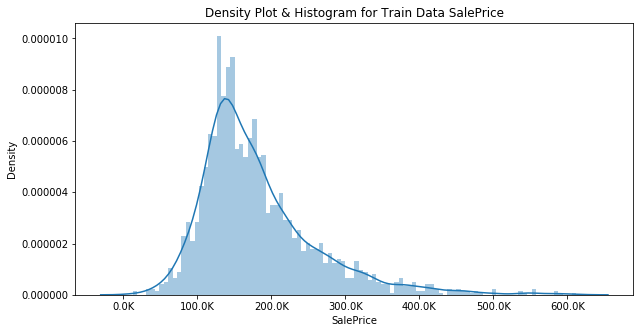

In [11]:
# Density Plot & Histogram for Train Data SalePrice
fig, ax = plt.subplots(figsize=(10,5))
ax=sns.distplot(train['SalePrice'],kde=True,bins=100)
xlabels = ['{}'.format(x) + 'K' for x in ax.get_xticks()/1000]
ax.set_xticklabels(xlabels)
ax.set_title('Density Plot & Histogram for Train Data SalePrice')
ax.set_xlabel('SalePrice')
ax.set_ylabel('Density');

 The distribution of train data SalePrice has a right-skewed distribution. Most of the transaction are priced bewtween 100k-200k.

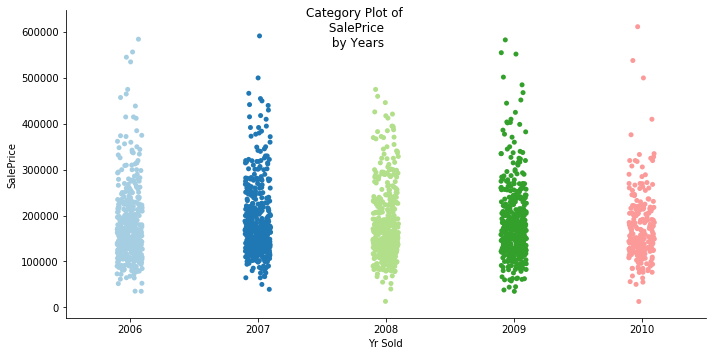

In [12]:
ax=sns.catplot(x="Yr Sold",y="SalePrice",data=train,palette='Paired',legend=True,height=5, aspect=2)
ax.fig.suptitle('Category Plot of \n SalePrice \n by Years');

The plot above shows the SalePrice distribution for houses in Ames from Year 2006 to Year 2010.<br>
we can note that the sales price is concentrate between 150,000 to 250,000.

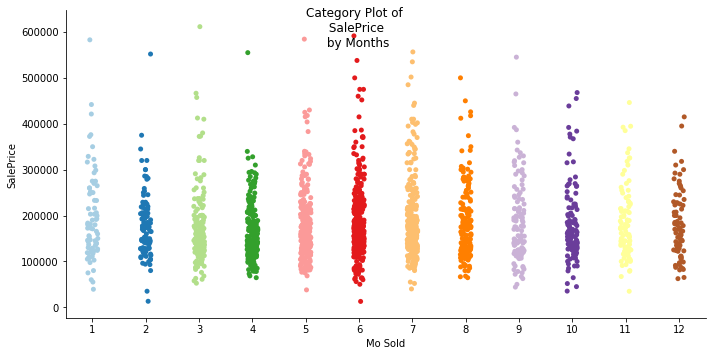

In [13]:
ax=sns.catplot(x="Mo Sold",y="SalePrice",data=train,palette='Paired',legend=True,height=5, aspect=2)
ax.fig.suptitle('Category Plot of \n SalePrice \n by Months');

<br>The plot above shows the SalePrice distribution for houses in Ames from throughout the 12 months of a year for 5 years (Year 2006-2010)
we can note that the there's more transactions during the month June.

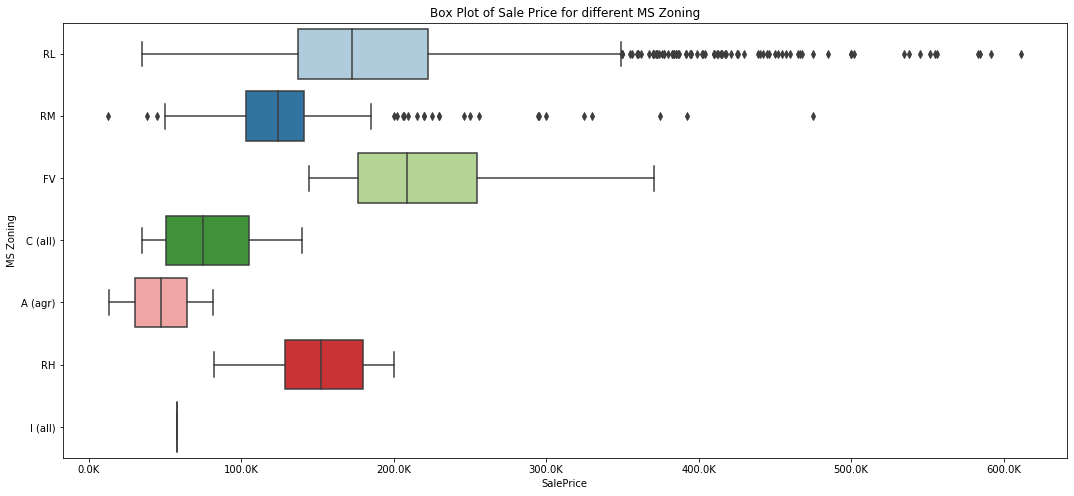

In [14]:
fig, ax = plt.subplots(figsize=(18,8))
ax=sns.boxplot(x="SalePrice",y="MS Zoning",data=train,palette='Paired',orient='h')
xlabels = ['{}'.format(x) + 'K' for x in ax.get_xticks()/1000]
ax.set_xticklabels(xlabels)
ax.set_title('Box Plot of Sale Price for different MS Zoning');

 The plot above shows that MZ Zoning FV Floating Village Residential is having median saleprice above 200k.


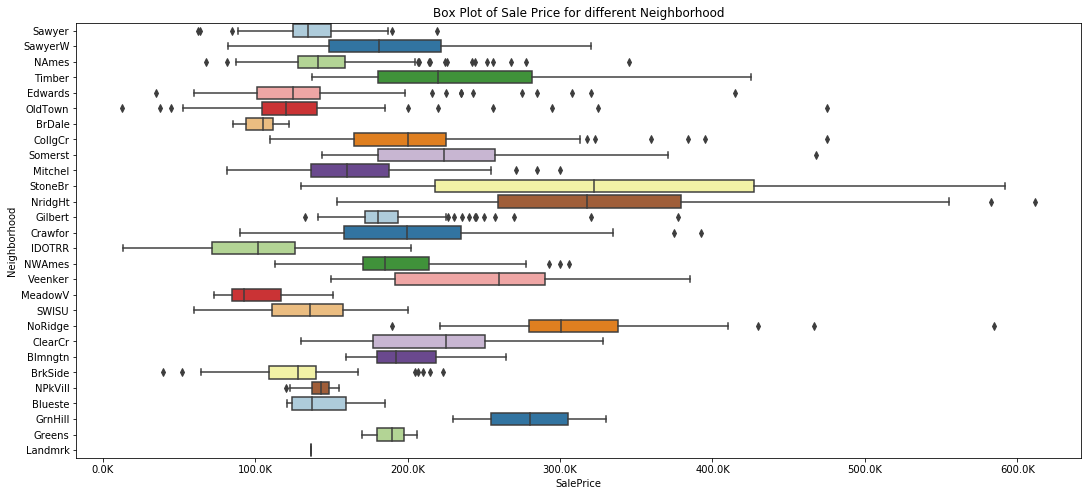

In [15]:
fig, ax = plt.subplots(figsize=(18,8))
ax=sns.boxplot(x="SalePrice",y="Neighborhood",data=train,palette='Paired',orient='h')
xlabels = ['{}'.format(x) + 'K' for x in ax.get_xticks()/1000]
ax.set_xticklabels(xlabels)
ax.set_title('Box Plot of Sale Price for different Neighborhood');

 <br>The plot above shows that neighbourhood StoneBr and NridgHt has median saleprice above 300k.

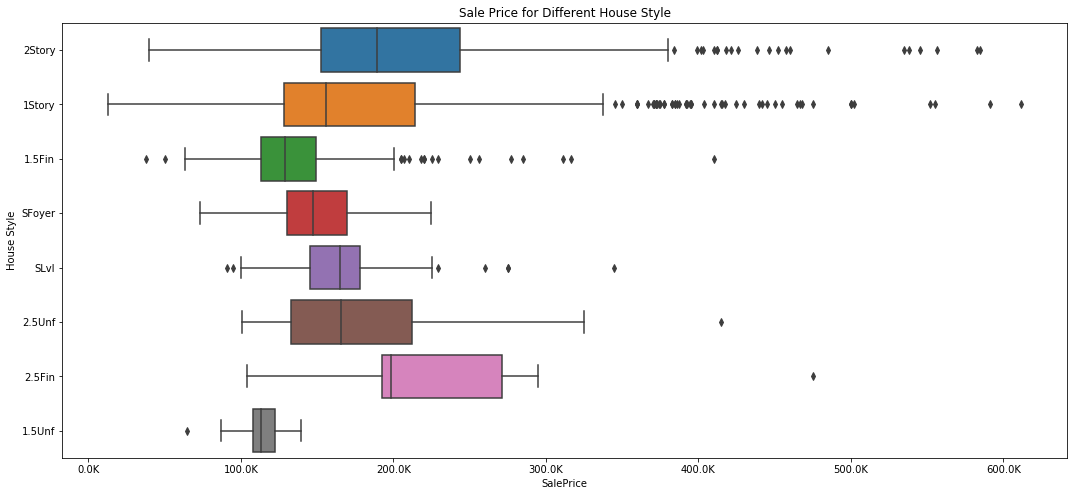

In [16]:
# Plot Boxplot for Sale Price of Different House Style
fix, ax = plt.subplots(figsize=(18,8))
ax= sns.boxplot(y='House Style',x='SalePrice',data=train,orient='h')
xlabels = ['{}'.format(x) + 'K' for x in ax.get_xticks()/1000]
ax.set_xticklabels(xlabels)
ax.set_title('Sale Price for Different House Style');

 The plot above shows that house style 2.5 finished has median saleprice above 200k.

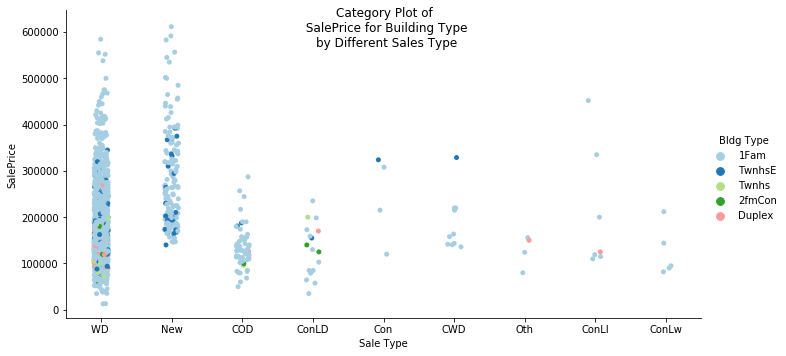

In [17]:

ax=sns.catplot(x="Sale Type",y="SalePrice",data=train,hue='Bldg Type',palette='Paired',legend=True,height=5, aspect=2)
ax.fig.suptitle('Category Plot of \n SalePrice for Building Type \nby Different Sales Type');

Most of the Sales Type between Year 2006 to Year 2010 are WD- Warranty Deed - Conventional, followed by New- Home just constructed and sold. Majority of the building type sold are 1Fam-Single-family Detached.

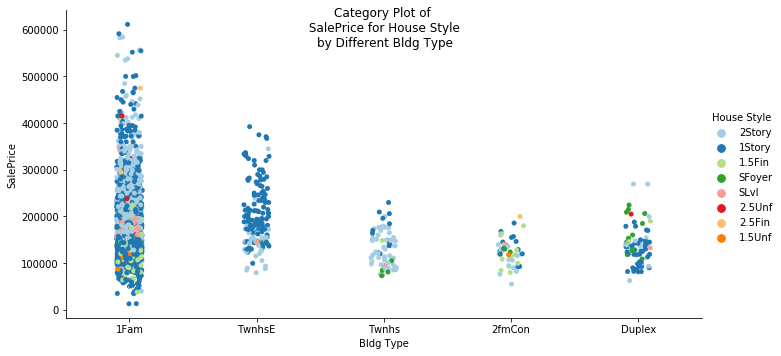

In [18]:
ax=sns.catplot(x="Bldg Type",y="SalePrice",data=train,hue='House Style',palette='Paired',legend=True,height=5, aspect=2)
ax.fig.suptitle('Category Plot of \n SalePrice for House Style \nby Different Bldg Type');

 Most of the sales transaction involved Single-family Detached building with a mix of 1story, 2story and 1.5story and followed by Townhouse End Unit building with one story.

Handling Null Values

In [19]:
# plot a histogram to check on Lot Frontage frequency distribution.
# plt.hist(train['Lot Frontage'])
# plt.title('Histogram of Lot Frontage')
# plt.xlabel('Lot Frontage')
# plt.ylabel('Frequency');

In [20]:
# check Lot Frontage & Lot Config
train[train['Lot Frontage'].isnull()&train['Alley'].isnull()]['Lot Config'].value_counts()

Inside     182
Corner      67
CulDSac     61
FR2         11
FR3          1
Name: Lot Config, dtype: int64

330 null value in Lot Frontage is due to units with no Frontage. The distribution of Lot Frontage in the train data is not normally distributed, thus the null value is replaced by the median value of Lot Frontage.

Amongst 330 property with null value in Lot Frontage, 322 has null value for Alley too. When examin the Lot Configuration for Lot Frontagw with null value, there are mostly Inside Lot, Corner Lot or CulDSac Lot, which could be having "0" Lot Frontage area. On the other hand, there are 11 Frontage on 2 sides of property and  & 1 Frontage on 3 sides on property which have found to be mislabeled as null frontage. <br>
Null value for frontage will be filled with lot frontage median in order to maintain lot frontage median of the whole dataset.


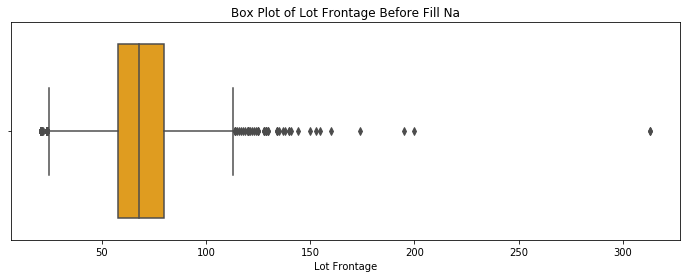

In [21]:
# Plot a boxplot of Lot Frontage Before Fill Na 
fix, ax = plt.subplots(figsize=(12,4))
ax= sns.boxplot(y='Lot Frontage',data=train,orient='h',color='orange').set_title('Box Plot of Lot Frontage Before Fill Na')

Box Plot of Lot Frontage Before Fill Na showing distribution of data before fillna.

In [22]:
# Fill Lot Frontage Null Value with Lot Frontage column's median
train['Lot Frontage']=train['Lot Frontage'].fillna(value=train['Lot Frontage'].median())

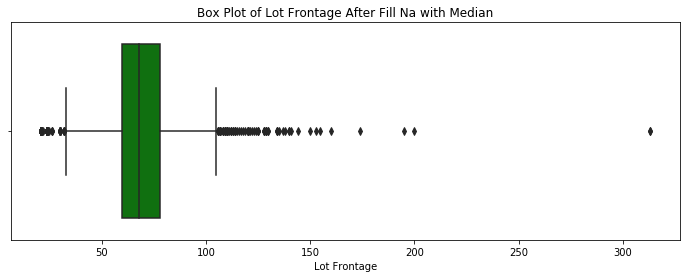

In [23]:
# Plot a boxplot of Lot Frontage After Filling Na  with Lot Frontage median
fix, ax = plt.subplots(figsize=(12,4))
ax= sns.boxplot(y='Lot Frontage',data=train,orient='h',color='green').set_title('Box Plot of Lot Frontage After Fill Na with Median')

Box Plot of Lot Frontage After Fill Na showing distribution of data after fillna.No major impact after fillna with Lot Frontage median.

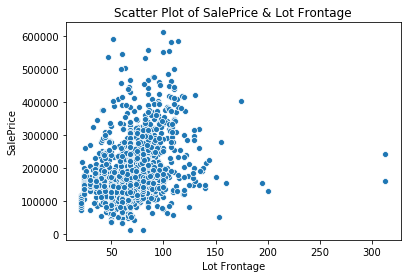

In [24]:
# Plot a scatterplot to see relationship between Lot Frontage and SalePrice
sns.scatterplot(x='Lot Frontage',y='SalePrice',data=train).set_title('Scatter Plot of SalePrice & Lot Frontage');

 Scatter plot between SalePrice and LotFrontage shows the 2 outliers of Lot Frontage has SalePrice within arange from 150K to 250K.<br>
The outlier seems to be variability in the data. Thus the outliers were not removed.


1911 null value in Alley is due to units with no Alley acess. Alley column comprises categorial variable, thus the null values will be updated with value'0'.


1911 null value in Alley is due to units with no Alley acess (as indicated in data dictionary, there are units with no Alley access). Alley column comprises categorial variable, thus the null values will be updated with value'0'.

In [25]:
# Update Null value in Alley column with 0
train['Alley']=train['Alley'].fillna(value=0)

In [26]:
# Check if update is done properly
train[train['Alley'].isnull()]

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice



The 22 null value in Mas Vnr Type & Mas Vnr Area are due to missing value. Null value for Mas Vnr Type is filled with the mode item 'None' while null value for Mas Vnr Area is filled with value '0' (corressponding value for None Mas Vnr Area).

In [27]:
a=train[train['Mas Vnr Area'].isnull()&train['Mas Vnr Type'].isnull()]
df_obj_a = a.select_dtypes(include=['object']).copy()
for c in df_obj_a.columns:
    print ("---- %s ---" % c)
    print (df_obj_a[c].value_counts())
    print('Unique_Value_Count: '+ str((len(df_obj_a[c].unique()))))

---- MS Zoning ---
RL    15
FV     7
Name: MS Zoning, dtype: int64
Unique_Value_Count: 2
---- Street ---
Pave    22
Name: Street, dtype: int64
Unique_Value_Count: 1
---- Alley ---
0       20
Pave     2
Name: Alley, dtype: int64
Unique_Value_Count: 2
---- Lot Shape ---
Reg    11
IR1    10
IR2     1
Name: Lot Shape, dtype: int64
Unique_Value_Count: 3
---- Land Contour ---
Lvl    21
HLS     1
Name: Land Contour, dtype: int64
Unique_Value_Count: 2
---- Utilities ---
AllPub    22
Name: Utilities, dtype: int64
Unique_Value_Count: 1
---- Lot Config ---
Inside     14
Corner      5
CulDSac     2
FR2         1
Name: Lot Config, dtype: int64
Unique_Value_Count: 4
---- Land Slope ---
Gtl    22
Name: Land Slope, dtype: int64
Unique_Value_Count: 1
---- Neighborhood ---
Somerst    10
Gilbert     5
NridgHt     2
CollgCr     1
Timber      1
Edwards     1
SawyerW     1
Crawfor     1
Name: Neighborhood, dtype: int64
Unique_Value_Count: 8
---- Condition 1 ---
Norm     17
RRAn      3
Feedr     2
Name: Cond

In [28]:
# Update Null value in Mas Vnr Type column with it's mode
train['Mas Vnr Type']= train['Mas Vnr Type'].fillna(train['Mas Vnr Type'].mode()[0])

In [29]:
# Check if update is done properly
train[train['Mas Vnr Type'].isnull()]

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice


C:\Users\user\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\user\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


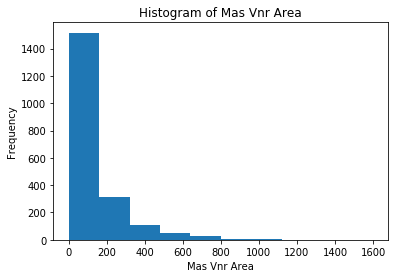

In [30]:
# plot a histogram to check on Mas Vnr Area frequency distribution.
plt.hist(train['Mas Vnr Area'])
plt.title('Histogram of Mas Vnr Area')
plt.xlabel('Mas Vnr Area')
plt.ylabel('Frequency');


Histogram of Mas Vnr Area shows there are high frequency in '0'.

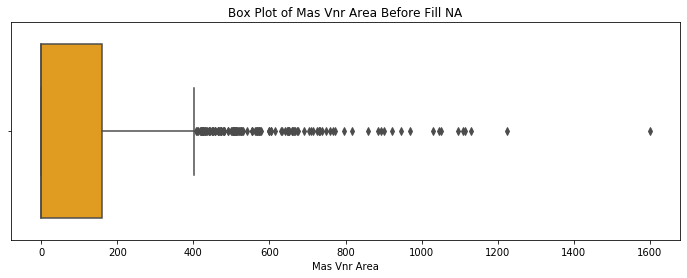

In [31]:
# Plot a boxplot of Mas Vnr Area Before Fill Na 
fix, ax = plt.subplots(figsize=(12,4))
ax= sns.boxplot(y='Mas Vnr Area',data=train,orient='h',color='orange').set_title('Box Plot of Mas Vnr Area Before Fill NA')


Box Plot of Mas Vnr Area Before Fill Na showing distribution of data before fillna.

In [32]:
# Update Null value in Mas Vnr Area column with 0
train['Mas Vnr Area']=train['Mas Vnr Area'].fillna(value=0)

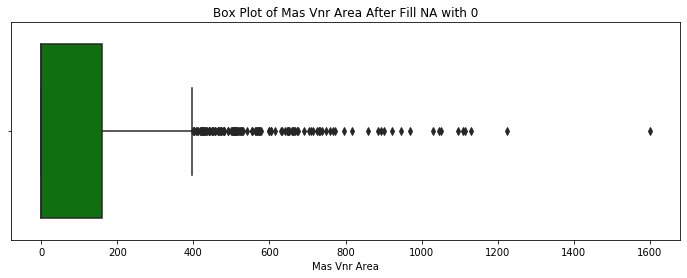

In [33]:
# Plot a boxplot of Mas Vnr Area After Fill Na 
fix, ax = plt.subplots(figsize=(12,4))
ax= sns.boxplot(y='Mas Vnr Area',data=train,orient='h',color='green').set_title('Box Plot of Mas Vnr Area After Fill NA with 0')


Box Plot of Mas Vnr Area After Fill Na showing distribution of data after fillna.No major impact after fillna with value 0.

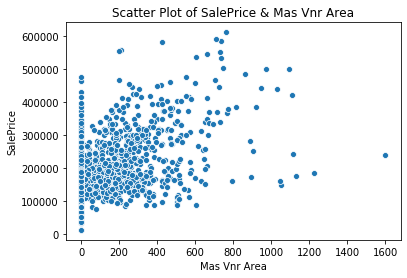

In [34]:
# Plot a scatterplot to see relationship between Lot Frontage and SalePrice
sns.scatterplot(x='Mas Vnr Area',y='SalePrice',data=train).set_title('Scatter Plot of SalePrice & Mas Vnr Area');

Scatter plot between SalePrice and Mas Vnr Area shows outliers of Mas Vnr Area has SalePrice within arange from 200K to 300K.
The outlier seems to be variability in the data. Thus the outliers were not removed.


The 55 null value in Bsmt Qual,Bsmt Cond, BsmtFin Type 1,Bsmt Exposure,BsmtFin Type 2 are due to housing with no basement. Null value for Bsmt Qual,Bsmt Cond & BsmtFin Type 1,Bsmt Exposure,BsmtFin Type 2 are filled with '0'.

In [35]:

# Check all 5 columns of Bsmt Qual,Bsmt Cond, BsmtFin Type 1,Bsmt Exposure and BsmtFin Type 2 is null
check_basement=train[(train['Bsmt Qual'].isnull())&(train['Bsmt Cond'].isnull())&(train['BsmtFin Type 1'].isnull())&(train['Bsmt Exposure'].isnull())&(train['BsmtFin Type 2'].isnull())]
basement_null=check_basement[['Id','Bsmt Qual','Bsmt Cond','BsmtFin Type 1','Bsmt Exposure','BsmtFin Type 2', 'BsmtFin SF 1','BsmtFin SF 2','Bsmt Unf SF','Total Bsmt SF']]
basement_null

,Id,Bsmt Qual,Bsmt Cond,BsmtFin Type 1,Bsmt Exposure,BsmtFin Type 2,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF
12,807,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0
93,811,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0
114,781,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0
146,888,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0
183,1554,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0
240,2740,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0
249,2242,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0
256,2745,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0
390,84,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0
437,1501,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0


In [36]:

len(basement_null)

55


When checking for null value in Bsmt Qual,Bsmt Cond, BsmtFin Type 1,Bsmt Exposure,BsmtFin Type 2, BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF and Total Bsmt SF shows "0" value.<br>
Thus 55 null value in Bsmt Qual,Bsmt Cond, BsmtFin Type 1,Bsmt Exposure,BsmtFin Type 2 are due to housing with no basement. Null value for Bsmt Qual,Bsmt Cond & BsmtFin Type 1,Bsmt Exposure,BsmtFin Type 2 are filled with '0'.

In [37]:
# Update null value for columns 'Bsmt Qual','Bsmt Cond','BsmtFin Type 1','Bsmt Exposure','BsmtFin Type 2' with value 0
train.update(train[['Bsmt Qual','Bsmt Cond','BsmtFin Type 1','Bsmt Exposure','BsmtFin Type 2']].fillna(value=0))

In [38]:
# check on last 2 ID returned in queries above to ensure changes has been correctly made. 
train[(train['Id']==2338)|(train['Id']==2880)]

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
1933,2338,527226010,60,RL,68.0,14762,Pave,0,IR2,Lvl,AllPub,Corner,Gtl,Gilbert,Feedr,Norm,1Fam,2Story,5,6,1948,1950,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,Slab,0,0,0,0,0.0,0,0.0,0.0,0.0,GasA,Gd,Y,SBrkr,1547,720,53,2320,0.0,0.0,2,0,2,1,TA,7,Typ,1,TA,Attchd,1979.0,Unf,2.0,672.0,TA,TA,P,120,144,0,0,0,0,NaN,NaN,NaN,0,5,2006,WD,169000
2010,2880,911175410,30,C (all),69.0,12366,Pave,0,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Feedr,Norm,1Fam,1Story,3,5,1945,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,Slab,0,0,0,0,0.0,0,0.0,0.0,0.0,GasA,TA,N,SBrkr,729,0,0,729,0.0,0.0,1,0,2,1,TA,5,Mod,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,N,0,0,23,0,0,0,NaN,NaN,NaN,0,10,2006,WD,51689


In [39]:
# Check all 4 columns of BsmtFin SF 1,BsmtFin SF 2, Bsmt Unf SF and Total Bsmt SF is null
check_basement_2=train[(train['BsmtFin SF 1'].isnull())&(train['BsmtFin SF 2'].isnull())&(train['Bsmt Unf SF'].isnull())&(train['Total Bsmt SF'].isnull())]
check_basement_2[['Id','BsmtFin SF 1','BsmtFin SF 2','Bsmt Unf SF','Total Bsmt SF']]

,Id,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF
1327,1342,NaN,NaN,NaN,NaN


The 4 null value in BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF are due to housing with no basement. Null value for BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF are filled with '0'.

In [40]:
# Update null value for columns 'BsmtFin SF 1','BsmtFin SF 2','Bsmt Unf SF','Total Bsmt SF' with value 0
train.update(train[['BsmtFin SF 1','BsmtFin SF 2','Bsmt Unf SF','Total Bsmt SF']].fillna(value=0))

In [41]:
#check on last ID returned in queries above to ensure changes has been correctly made.
train[train['Id']==1342]

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
1327,1342,903230120,20,RM,99.0,5940,Pave,0,IR1,Lvl,AllPub,FR3,Gtl,BrkSide,Feedr,Norm,1Fam,1Story,4,7,1946,1950,Gable,CompShg,MetalSd,CBlock,None,0.0,TA,TA,PConc,0,0,0,0,0.0,0,0.0,0.0,0.0,GasA,TA,Y,FuseA,896,0,0,896,NaN,NaN,1,0,2,1,TA,4,Typ,0,NaN,Detchd,1946.0,Unf,1.0,280.0,TA,TA,Y,0,0,0,0,0,0,NaN,MnPrv,NaN,0,4,2008,ConLD,79000


 The 2 null value in Bsmt Full Bath & Bsmt Half Bath are due to housing with no basement. Null value for Bsmt Full Bath & Bsmt Half Bath are filled with '0.0'.

In [42]:
# Check all 3 columns of Bsmt Full Bath,Bsmt Half Bath is null
check_basement_3=train[(train['Bsmt Full Bath'].isnull())&(train['Bsmt Half Bath'].isnull())]
check_basement_3[['Id','Bsmt Full Bath','Bsmt Half Bath']]

,Id,Bsmt Full Bath,Bsmt Half Bath
616,1498,NaN,NaN
1327,1342,NaN,NaN


In [43]:
# Update null value for columns 'Bsmt Full Bath','Bsmt Half Bath' with value 0
train.update(train[['Bsmt Full Bath','Bsmt Half Bath']].fillna(value=0))

In [44]:
# check on last 2 ID returned in queries above to ensure changes has been correctly made.
train[(train['Id']==1498)|(train['Id']==1342)]

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
616,1498,908154080,20,RL,123.0,47007,Pave,0,IR1,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,5,7,1959,1996,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,Slab,0,0,0,0,0.0,0,0.0,0.0,0.0,GasA,TA,Y,SBrkr,3820,0,0,3820,0.0,0.0,3,1,5,1,Ex,11,Typ,2,Gd,Attchd,1959.0,Unf,2.0,624.0,TA,TA,Y,0,372,0,0,0,0,NaN,NaN,NaN,0,7,2008,WD,284700
1327,1342,903230120,20,RM,99.0,5940,Pave,0,IR1,Lvl,AllPub,FR3,Gtl,BrkSide,Feedr,Norm,1Fam,1Story,4,7,1946,1950,Gable,CompShg,MetalSd,CBlock,None,0.0,TA,TA,PConc,0,0,0,0,0.0,0,0.0,0.0,0.0,GasA,TA,Y,FuseA,896,0,0,896,0.0,0.0,1,0,2,1,TA,4,Typ,0,NaN,Detchd,1946.0,Unf,1.0,280.0,TA,TA,Y,0,0,0,0,0,0,NaN,MnPrv,NaN,0,4,2008,ConLD,79000



Data cleaning for other 4 Garage columns (Garage Finish,Garage Qual,Garage Cond & Garage Yr Blt ) involved 114 rows. However, there are only 113 null value for Garage Type and one null value each for Garage Cars and Garage Area respectively. This is due to one of the properties only have informaation filled for Garage Type. 

In [45]:
# Check all 3 columns of Garage Finish,Garage Qual and Garage Cond are  null but notnull for Garage Type
train[(train['Garage Finish'].isnull())&(train['Garage Qual'].isnull())&(train['Garage Cond'].isnull())&(train['Garage Yr Blt'].isnull())&(train['Garage Type'].notnull())]

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
1712,2237,910201180,70,RM,50.0,9060,Pave,0,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,2Story,5,6,1923,1999,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA,BrkTil,Gd,TA,No,ALQ,548.0,Unf,0.0,311.0,859.0,GasA,Ex,Y,SBrkr,942,886,0,1828,0.0,0.0,2,0,3,1,Gd,6,Typ,0,NaN,Detchd,NaN,NaN,NaN,NaN,NaN,NaN,Y,174,0,212,0,0,0,NaN,MnPrv,NaN,0,3,2007,WD,150909


In [46]:

# Check all 3 columns of Garage Finish,Garage Qual and Garage Cond are  null but notnull for Garage Type
check_garage=train[(train['Garage Finish'].isnull())&(train['Garage Qual'].isnull())&(train['Garage Cond'].isnull())&(train['Garage Yr Blt'].isnull())]
garage_null=check_garage[['Id','Garage Type','Garage Yr Blt','Garage Finish','Garage Cars','Garage Area','Garage Qual','Garage Cond']]
garage_null

,Id,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond
28,2243,NaN,NaN,NaN,0.0,0.0,NaN,NaN
53,330,NaN,NaN,NaN,0.0,0.0,NaN,NaN
65,2278,NaN,NaN,NaN,0.0,0.0,NaN,NaN
79,2235,NaN,NaN,NaN,0.0,0.0,NaN,NaN
101,2084,NaN,NaN,NaN,0.0,0.0,NaN,NaN
103,728,NaN,NaN,NaN,0.0,0.0,NaN,NaN
114,781,NaN,NaN,NaN,0.0,0.0,NaN,NaN
120,1492,NaN,NaN,NaN,0.0,0.0,NaN,NaN
134,1514,NaN,NaN,NaN,0.0,0.0,NaN,NaN
136,216,NaN,NaN,NaN,0.0,0.0,NaN,NaN


In [47]:
len(garage_null)

114

The above 113 rows of null value in Garage Type, Garage Finish,Garage Qual,Garage Cond columns are due to housing with no garage.<br>
Null value for Garage Type, Garage Finish,Garage Qual,Garage Cond are filled with '0'.

In this case properties with Id 2237 will have it's null value in Garage Cars and Garage Area be updated with Garbage Type: Detchd 'median.<br>
Garage Cars median by Garbage Type: Detchd =2<br>
Garage Area median by Garbage Type: Detchd =400<br>

Drop Id 2237 which has 4 columns of missing values for garbage and have only information on garbage type. <br>
Time consumed use to check for median/ mean for 4 columns for 1 entry doesnt justify. It is more efficient to just drop this observation.

In [48]:
# drop row with Id=2237
train.drop(train[train.Id==2237].index,inplace=True)

In [49]:
# Check if the row has been deleted
train[train['Id']==2237]

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice


In [50]:
# Check all 4 columns of 'Garage Finish','Garage Qual','Garage Cond','Garage Type' is null
#check_garage=train[(train['Garage Finish'].isnull())&(train['Garage Qual'].isnull())&(train['Garage Cond'].isnull())&(train['Garage Type'].isnull())]
#check_garage[['Id','Garage Finish','Garage Qual','Garage Cond','Garage Type']]

In [51]:
# Update null value for columns Garage Finish','Garage Qual','Garage Cond','Garage Type' with value 0
train.update(train[['Garage Finish','Garage Qual','Garage Cond','Garage Type']].fillna(value=0))

In [52]:
# check on last 2 ID returned in queries above to ensure changes has been correctly made.
train[(train['Id']==2288)|(train['Id']==2842)][[col for col in train.columns if 'Garage' in col]]

,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond
2039,0,NaN,0,0.0,0.0,0,0
2042,0,NaN,0,0.0,0.0,0,0


 The  null value in Garage Yr Blt is due to housing with no garage.Null value for Garage Yr Blt is filled with '0.0'.

In [53]:

# Check columns of Garage Yr Blt is null
check_garage_2=train[(train['Garage Yr Blt'].isnull())]
garage_yr_null=check_garage_2[['Id','Year Remod/Add','Garage Type','Garage Yr Blt','Garage Finish','Garage Cars','Garage Area','Garage Qual','Garage Cond']]
garage_yr_null

,Id,Year Remod/Add,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond
28,2243,2006,0,NaN,0,0.0,0.0,0,0
53,330,1970,0,NaN,0,0.0,0.0,0,0
65,2278,2007,0,NaN,0,0.0,0.0,0,0
79,2235,2003,0,NaN,0,0.0,0.0,0,0
101,2084,2002,0,NaN,0,0.0,0.0,0,0
103,728,1950,0,NaN,0,0.0,0.0,0,0
114,781,1950,0,NaN,0,0.0,0.0,0,0
120,1492,1969,0,NaN,0,0.0,0.0,0,0
134,1514,1950,0,NaN,0,0.0,0.0,0,0
136,216,1996,0,NaN,0,0.0,0.0,0,0


In [54]:
len(garage_yr_null)

113

In [55]:
# Update null value for Garage Yr Blt with value 0
train.update(train[['Garage Yr Blt']].fillna(value=0))

In [56]:
# 
# Update null value for Garage Yr Blt with Year Remod/Add
#train.update(train[['Garage Yr Blt']].fillna(value=train['Year Remod/Add']))

In [57]:
# check on last 2 ID returned in queries above to ensure changes has been correctly made.
train[(train['Id']==2288)|(train['Id']==2842)]

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
2039,2288,923228220,160,RM,21.0,1495,Pave,0,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,TwnhsE,2Story,4,6,1970,1970,Gable,CompShg,CemntBd,CmentBd,BrkFace,189.0,TA,TA,CBlock,TA,TA,No,ALQ,384.0,Unf,0.0,162.0,546.0,GasA,Ex,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,5,Typ,0,NaN,0,0.0,0,0.0,0.0,0,0,Y,0,64,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,93900
2042,2842,909101080,50,RL,45.0,8248,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1.5Fin,4,4,1922,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0.0,Unf,0.0,864.0,864.0,GasA,TA,N,SBrkr,964,0,450,1414,0.0,0.0,1,0,3,1,TA,8,Typ,1,Gd,0,0.0,0,0.0,0.0,0,0,N,0,0,112,0,0,0,NaN,NaN,NaN,0,9,2006,COD,83000


Fireplace quality,Pool quality,Fence & Misc Feature are categorial variable, and not all the properties is having this features, thus the missing value will be filled with '0'.

In [58]:
# Update null value for Fireplace Qu','Pool QC','Fence','Misc Feature' with value 0
col=['Fireplace Qu','Pool QC','Fence','Misc Feature']
[train[col].fillna(value=0,inplace=True) for col in train.columns]

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [59]:
#last check if there anymore null value in the train data table
null_columns=train.columns[train.isnull().any()]
train[null_columns].isnull().sum()

Series([], dtype: float64)

In [60]:
# check train data shape
train.shape

(2050, 81)

1 row with Id 2237has been dropped earlier

In [61]:
# Insert a new column with column name'train' and update column values with 1 to indicate this partt of data belongs 
# train data set
train.insert(loc=0,column='train',value=1)

In [62]:
# Check header
train.head(3)

,train,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,1,109,533352170,60,RL,68.0,13517,Pave,0,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,Gd,TA,CBlock,TA,TA,No,GLQ,533.0,Unf,0.0,192.0,725.0,GasA,Ex,Y,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,Gd,6,Typ,0,0,Attchd,1976.0,RFn,2.0,475.0,TA,TA,Y,0,44,0,0,0,0,0,0,0,0,3,2010,WD,130500
1,1,544,531379050,60,RL,43.0,11492,Pave,0,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,Gd,TA,PConc,Gd,TA,No,GLQ,637.0,Unf,0.0,276.0,913.0,GasA,Ex,Y,SBrkr,913,1209,0,2122,1.0,0.0,2,1,4,1,Gd,8,Typ,1,TA,Attchd,1997.0,RFn,2.0,559.0,TA,TA,Y,0,74,0,0,0,0,0,0,0,0,4,2009,WD,220000
2,1,153,535304180,20,RL,68.0,7922,Pave,0,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,Gd,CBlock,TA,TA,No,GLQ,731.0,Unf,0.0,326.0,1057.0,GasA,TA,Y,SBrkr,1057,0,0,1057,1.0,0.0,1,0,3,1,Gd,5,Typ,0,0,Detchd,1953.0,Unf,1.0,246.0,TA,TA,Y,0,52,0,0,0,0,0,0,0,0,1,2010,WD,109000


In [63]:
# Check shape
train.shape

(2050, 82)

In [64]:
# export clean file to csv format as train_clean.csv
# train.to_csv('train_clean.csv',index=False)

# Import and Read Cleaned Train and Test Dataset

In [65]:
# import and read train_clean csv file.
train_clean_csv='./datasets/train_clean.csv'
train_clean=pd.read_csv(train_clean_csv)

In [66]:
# check df head
train_clean.head()

,train,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,1,109,533352170,60,RL,68.0,13517,Pave,0,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,Gd,TA,CBlock,TA,TA,No,GLQ,533.0,Unf,0.0,192.0,725.0,GasA,Ex,Y,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,Gd,6,Typ,0,0,Attchd,1976.0,RFn,2.0,475.0,TA,TA,Y,0,44,0,0,0,0,0,0,0,0,3,2010,WD,130500
1,1,544,531379050,60,RL,43.0,11492,Pave,0,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,Gd,TA,PConc,Gd,TA,No,GLQ,637.0,Unf,0.0,276.0,913.0,GasA,Ex,Y,SBrkr,913,1209,0,2122,1.0,0.0,2,1,4,1,Gd,8,Typ,1,TA,Attchd,1997.0,RFn,2.0,559.0,TA,TA,Y,0,74,0,0,0,0,0,0,0,0,4,2009,WD,220000
2,1,153,535304180,20,RL,68.0,7922,Pave,0,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,Gd,CBlock,TA,TA,No,GLQ,731.0,Unf,0.0,326.0,1057.0,GasA,TA,Y,SBrkr,1057,0,0,1057,1.0,0.0,1,0,3,1,Gd,5,Typ,0,0,Detchd,1953.0,Unf,1.0,246.0,TA,TA,Y,0,52,0,0,0,0,0,0,0,0,1,2010,WD,109000
3,1,318,916386060,60,RL,73.0,9802,Pave,0,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,384.0,384.0,GasA,Gd,Y,SBrkr,744,700,0,1444,0.0,0.0,2,1,3,1,TA,7,Typ,0,0,BuiltIn,2007.0,Fin,2.0,400.0,TA,TA,Y,100,0,0,0,0,0,0,0,0,0,4,2010,WD,174000
4,1,255,906425045,50,RL,82.0,14235,Pave,0,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1.5Fin,6,8,1900,1993,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA,PConc,Fa,Gd,No,Unf,0.0,Unf,0.0,676.0,676.0,GasA,TA,Y,SBrkr,831,614,0,1445,0.0,0.0,2,0,3,1,TA,6,Typ,0,0,Detchd,1957.0,Unf,2.0,484.0,TA,TA,N,0,59,0,0,0,0,0,0,0,0,3,2010,WD,138500


In [67]:
# check df shape
train_clean.shape

(2050, 82)

## test csv

it has been cleaned in another notebook, importing here

`test_clean` was cleaned in another notebook 'Test_dataset_cleaning'.

In [68]:
# import and read test_clean csv file.
test_clean_csv='./datasets/test_clean.csv'
test_clean=pd.read_csv(test_clean_csv)

In [69]:
# check df head
test_clean.head()

,train,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type
0,0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,2fmCon,2Story,6,8,1910,1950,Gable,CompShg,AsbShng,AsbShng,None,0.0,TA,Fa,Stone,Fa,TA,No,Unf,0,Unf,0,1020,1020,GasA,Gd,N,FuseP,908,1020,0,1928,0,0,2,0,4,2,Fa,9,Typ,0,0,Detchd,1910.0,Unf,1,440,Po,Po,Y,0,60,112,0,0,0,0,0,0,0,4,2006,WD
1,0,2718,905108090,90,RL,68.0,9662,Pave,0,IR1,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,Duplex,1Story,5,4,1977,1977,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,CBlock,Gd,TA,No,Unf,0,Unf,0,1967,1967,GasA,TA,Y,SBrkr,1967,0,0,1967,0,0,2,0,6,2,TA,10,Typ,0,0,Attchd,1977.0,Fin,2,580,TA,TA,Y,170,0,0,0,0,0,0,0,0,0,8,2006,WD
2,0,2414,528218130,60,RL,58.0,17104,Pave,0,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,7,5,2006,2006,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,Gd,Av,GLQ,554,Unf,0,100,654,GasA,Ex,Y,SBrkr,664,832,0,1496,1,0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,2006.0,RFn,2,426,TA,TA,Y,100,24,0,0,0,0,0,0,0,0,9,2006,New
3,0,1989,902207150,30,RM,60.0,8520,Pave,0,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,1Story,5,6,1923,2006,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,Gd,TA,CBlock,TA,TA,No,Unf,0,Unf,0,968,968,GasA,TA,Y,SBrkr,968,0,0,968,0,0,1,0,2,1,TA,5,Typ,0,0,Detchd,1935.0,Unf,2,480,Fa,TA,N,0,0,184,0,0,0,0,0,0,0,7,2007,WD
4,0,625,535105100,20,RL,68.0,9500,Pave,0,IR1,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1963,1963,Gable,CompShg,Plywood,Plywood,BrkFace,247.0,TA,TA,CBlock,Gd,TA,No,BLQ,609,Unf,0,785,1394,GasA,Gd,Y,SBrkr,1394,0,0,1394,1,0,1,1,3,1,TA,6,Typ,2,Gd,Attchd,1963.0,RFn,2,514,TA,TA,Y,0,76,0,0,185,0,0,0,0,0,7,2009,WD


In [70]:
# check df shape
test_clean.shape

(879, 81)

In [71]:
# create a new df name train_test to combined both train_clean & test_clean
frames=[train_clean,test_clean]
train_test=pd.concat(frames)

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  This is separate from the ipykernel package so we can avoid doing imports until


In [72]:
# check new df head
train_test.head()

,1st Flr SF,2nd Flr SF,3Ssn Porch,Alley,Bedroom AbvGr,Bldg Type,Bsmt Cond,Bsmt Exposure,Bsmt Full Bath,Bsmt Half Bath,Bsmt Qual,Bsmt Unf SF,BsmtFin SF 1,BsmtFin SF 2,BsmtFin Type 1,BsmtFin Type 2,Central Air,Condition 1,Condition 2,Electrical,Enclosed Porch,Exter Cond,Exter Qual,Exterior 1st,Exterior 2nd,Fence,Fireplace Qu,Fireplaces,Foundation,Full Bath,Functional,Garage Area,Garage Cars,Garage Cond,Garage Finish,Garage Qual,Garage Type,Garage Yr Blt,Gr Liv Area,Half Bath,Heating,Heating QC,House Style,Id,Kitchen AbvGr,Kitchen Qual,Land Contour,Land Slope,Lot Area,Lot Config,Lot Frontage,Lot Shape,Low Qual Fin SF,MS SubClass,MS Zoning,Mas Vnr Area,Mas Vnr Type,Misc Feature,Misc Val,Mo Sold,Neighborhood,Open Porch SF,Overall Cond,Overall Qual,PID,Paved Drive,Pool Area,Pool QC,Roof Matl,Roof Style,Sale Type,SalePrice,Screen Porch,Street,TotRms AbvGrd,Total Bsmt SF,Utilities,Wood Deck SF,Year Built,Year Remod/Add,Yr Sold,train
0,725,754,0,0,3,1Fam,TA,No,0.0,0.0,TA,192.0,533.0,0.0,GLQ,Unf,Y,RRAe,Norm,SBrkr,0,TA,Gd,HdBoard,Plywood,0,0,0,CBlock,2,Typ,475.0,2.0,TA,RFn,TA,Attchd,1976.0,1479,1,GasA,Ex,2Story,109,1,Gd,Lvl,Gtl,13517,CulDSac,68.0,IR1,0,60,RL,289.0,BrkFace,0,0,3,Sawyer,44,8,6,533352170,Y,0,0,CompShg,Gable,WD,130500.0,0,Pave,6,725.0,AllPub,0,1976,2005,2010,1
1,913,1209,0,0,4,1Fam,TA,No,1.0,0.0,Gd,276.0,637.0,0.0,GLQ,Unf,Y,Norm,Norm,SBrkr,0,TA,Gd,VinylSd,VinylSd,0,TA,1,PConc,2,Typ,559.0,2.0,TA,RFn,TA,Attchd,1997.0,2122,1,GasA,Ex,2Story,544,1,Gd,Lvl,Gtl,11492,CulDSac,43.0,IR1,0,60,RL,132.0,BrkFace,0,0,4,SawyerW,74,5,7,531379050,Y,0,0,CompShg,Gable,WD,220000.0,0,Pave,8,913.0,AllPub,0,1996,1997,2009,1
2,1057,0,0,0,3,1Fam,TA,No,1.0,0.0,TA,326.0,731.0,0.0,GLQ,Unf,Y,Norm,Norm,SBrkr,0,Gd,TA,VinylSd,VinylSd,0,0,0,CBlock,1,Typ,246.0,1.0,TA,Unf,TA,Detchd,1953.0,1057,0,GasA,TA,1Story,153,1,Gd,Lvl,Gtl,7922,Inside,68.0,Reg,0,20,RL,0.0,None,0,0,1,NAmes,52,7,5,535304180,Y,0,0,CompShg,Gable,WD,109000.0,0,Pave,5,1057.0,AllPub,0,1953,2007,2010,1
3,744,700,0,0,3,1Fam,TA,No,0.0,0.0,Gd,384.0,0.0,0.0,Unf,Unf,Y,Norm,Norm,SBrkr,0,TA,TA,VinylSd,VinylSd,0,0,0,PConc,2,Typ,400.0,2.0,TA,Fin,TA,BuiltIn,2007.0,1444,1,GasA,Gd,2Story,318,1,TA,Lvl,Gtl,9802,Inside,73.0,Reg,0,60,RL,0.0,None,0,0,4,Timber,0,5,5,916386060,Y,0,0,CompShg,Gable,WD,174000.0,0,Pave,7,384.0,AllPub,100,2006,2007,2010,1
4,831,614,0,0,3,1Fam,Gd,No,0.0,0.0,Fa,676.0,0.0,0.0,Unf,Unf,Y,Norm,Norm,SBrkr,0,TA,TA,Wd Sdng,Plywood,0,0,0,PConc,2,Typ,484.0,2.0,TA,Unf,TA,Detchd,1957.0,1445,0,GasA,TA,1.5Fin,255,1,TA,Lvl,Gtl,14235,Inside,82.0,IR1,0,50,RL,0.0,None,0,0,3,SawyerW,59,8,6,906425045,N,0,0,CompShg,Gable,WD,138500.0,0,Pave,6,676.0,AllPub,0,1900,1993,2010,1


In [73]:
# Check new df shape
train_test.shape

(2929, 82)

In [74]:
#last check if there any null value in the new df
null_columns=train_test.columns[train_test.isnull().any()]
train_test[null_columns].isnull().sum()

SalePrice    879
dtype: int64

the 879 null value is from test dataset designed to be null.

# Create and Add New Columns for Train and Test Dataset

In [75]:
# Create New Column which calculate Property Age.

train_test['Property Age']=train_test['Yr Sold']-train_test['Year Built']

In [76]:
#Create New Column which calculate Property Remodel Age..
train_test['Remodel Age']=train_test['Yr Sold']-train_test['Year Remod/Add']

In [77]:
# Create New Column which indicate if the property has undergone Remodel/Add.
train_test['Remod/Add']=np.where(train_test['Remodel Age']<train_test['Property Age'],1,0)

In [78]:
# Check to see if there's any property which has not undrgone Remod/ Add
train_test[train_test['Remod/Add']==0].head(2)

,1st Flr SF,2nd Flr SF,3Ssn Porch,Alley,Bedroom AbvGr,Bldg Type,Bsmt Cond,Bsmt Exposure,Bsmt Full Bath,Bsmt Half Bath,Bsmt Qual,Bsmt Unf SF,BsmtFin SF 1,BsmtFin SF 2,BsmtFin Type 1,BsmtFin Type 2,Central Air,Condition 1,Condition 2,Electrical,Enclosed Porch,Exter Cond,Exter Qual,Exterior 1st,Exterior 2nd,Fence,Fireplace Qu,Fireplaces,Foundation,Full Bath,Functional,Garage Area,Garage Cars,Garage Cond,Garage Finish,Garage Qual,Garage Type,Garage Yr Blt,Gr Liv Area,Half Bath,Heating,Heating QC,House Style,Id,Kitchen AbvGr,Kitchen Qual,Land Contour,Land Slope,Lot Area,Lot Config,Lot Frontage,Lot Shape,Low Qual Fin SF,MS SubClass,MS Zoning,Mas Vnr Area,Mas Vnr Type,Misc Feature,Misc Val,Mo Sold,Neighborhood,Open Porch SF,Overall Cond,Overall Qual,PID,Paved Drive,Pool Area,Pool QC,Roof Matl,Roof Style,Sale Type,SalePrice,Screen Porch,Street,TotRms AbvGrd,Total Bsmt SF,Utilities,Wood Deck SF,Year Built,Year Remod/Add,Yr Sold,train,Property Age,Remodel Age,Remod/Add
7,1188,0,0,0,3,1Fam,TA,No,1.0,0.0,TA,188.0,1000.0,0.0,Rec,Unf,Y,Norm,Norm,SBrkr,0,TA,TA,Plywood,Plywood,MnPrv,0,0,CBlock,1,Typ,531.0,2.0,TA,RFn,TA,Attchd,1959.0,1188,0,GasA,Fa,1Story,145,1,TA,Lvl,Gtl,12160,Inside,68.0,IR1,0,20,RL,180.0,BrkFace,0,0,5,NAmes,0,5,5,535154050,Y,0,0,CompShg,Hip,COD,142000.0,0,Pave,6,1188.0,AllPub,0,1959,1959,2010,1,51,51,0
8,924,0,0,0,2,1Fam,TA,No,0.0,0.0,TA,632.0,292.0,0.0,Rec,Unf,Y,Artery,Norm,SBrkr,0,TA,TA,Wd Sdng,Wd Sdng,MnPrv,0,0,CBlock,1,Typ,420.0,1.0,TA,Unf,TA,Detchd,1952.0,924,0,GasA,TA,1Story,1942,1,TA,Lvl,Gtl,15783,Inside,68.0,Reg,0,20,RL,0.0,None,Shed,400,6,OldTown,324,5,5,535353130,Y,0,0,CompShg,Gable,WD,112500.0,0,Pave,6,924.0,AllPub,0,1952,1952,2007,1,55,55,0


# Binary Category Ordinary Category Mapping for Train and Test Dataset

In [79]:
# Map Binary Category Variable for 'Central Air'
train_test['Central Air']=train_test['Central Air'].map({'Y':1,'N':0})
print(train_test['Central Air'].dtypes)

int64


In [80]:
# Check unique value and their counts for respective column. the counts is useful when debugging.
train_test['Pool QC'].value_counts()

0     2916
Ex       4
Gd       4
TA       3
Fa       2
Name: Pool QC, dtype: int64

In [81]:
# Map Ordinal Category Variable into Numeric
train_test['Exter Qual']=train_test['Exter Qual'].map({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'0':0})

In [82]:
# Map Ordinal Category Variable into Numeric
train_test['Exter Cond']=train_test['Exter Cond'].map({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'0':0})

In [83]:
# Map Ordinal Category Variable into Numeric
train_test['Bsmt Qual']=train_test['Bsmt Qual'].map({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'0':0})

In [84]:
# Map Ordinal Category Variable into Numeric
train_test['Bsmt Cond']=train_test['Bsmt Cond'].map({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'0':0})

In [85]:
# Map Ordinal Category Variable into Numeric
train_test['Bsmt Exposure']=train_test['Bsmt Exposure'].map({'Gd':4,'Av':3,'Mn':2,'No':1,'0':0})

In [86]:
# Map Ordinal Category Variable into Numeric
train_test['BsmtFin Type 1']=train_test['BsmtFin Type 1'].map({'GLQ':6,'ALQ':5,'BLQ':4,'Rec':3,'LwQ':2,'Unf':1,'0':0})

In [87]:
# Map Ordinal Category Variable into Numeric
train_test['BsmtFin Type 2']=train_test['BsmtFin Type 2'].map({'GLQ':6,'ALQ':5,'BLQ':4,'Rec':3,'LwQ':2,'Unf':1,'0':0})

In [88]:
# Map Ordinal Category Variable into Numeric
train_test['Heating QC']=train_test['Heating QC'].map({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'0':0})

In [89]:
# Map Ordinal Category Variable into Numeric
train_test['Kitchen Qual']=train_test['Kitchen Qual'].map({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'0':0})

In [90]:
# Map Ordinal Category Variable into Numeric
train_test['Fireplace Qu']=train_test['Fireplace Qu'].map({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'0':0})

In [91]:
# Map Ordinal Category Variable into Numeric
train_test['Garage Qual']=train_test['Garage Qual'].map({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'0':0})

In [92]:
# Map Ordinal Category Variable into Numeric
train_test['Garage Cond']=train_test['Garage Cond'].map({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'0':0})

In [93]:
# Map Ordinal Category Variable into Numeric
train_test['Pool QC']=train_test['Pool QC'].map({'Ex':4,'Gd':3,'TA':2,'Fa':1,'0':0})

In [94]:
# Check for any null value after mapping to ensure mapping is successfully done.
null_columns=train_test.columns[train_test.isnull().any()]
train_test[null_columns].isnull().sum()

SalePrice    879
dtype: int64

the 879 null value is from test dataset designed to be null.


For ordianal categorial variable, the grading is mapped to numerical and stored within the same column instead of being one-hot-encoded to create dummy-variable with extra columns that do not fetch any insight when being listed seperately.<br>
For instance, it will be less meaningful to create one hot encoding for Pool Qc with dummies variable columns 'Ex','Gd','TA','Fa' as these individual columns are hard to be interpreted individually.<br>
On contrary, when the grading is mapped to numerical, further intepretation can br don by using the agrregation of the numeric score/

# One-hot Encode Categorial Variables for Train and Test Dataset

In [95]:
# One-hot encode categorical variables, setting pre-fix and drop frist column
train_test=pd.get_dummies(train_test,columns=['Lot Config','MS Zoning','Street','Alley','Lot Shape','Land Contour','Utilities','Land Slope','Neighborhood','Condition 1','Condition 2','Bldg Type','House Style','Roof Style','Roof Matl','Exterior 1st','Exterior 2nd','Mas Vnr Type','Foundation','Heating','Electrical','Functional','Garage Type','Garage Finish','Paved Drive','Fence','Misc Feature','Sale Type'],prefix=['lot_config','zon','rd_access','al_access','prop_shape','prop_flatness','utility','prop_slope','neigh','proxi_1','promxi_2','bldg_type','hse_style','r_style','r_mat','ex_1','ex_2','mas_type','found_','heat_','ele_','funct','garage_ty','garage_fin','paved_dr','fence','misc','sale_type'],drop_first=True)

In [96]:
# check df head
train_test.head()

,1st Flr SF,2nd Flr SF,3Ssn Porch,Bedroom AbvGr,Bsmt Cond,Bsmt Exposure,Bsmt Full Bath,Bsmt Half Bath,Bsmt Qual,Bsmt Unf SF,BsmtFin SF 1,BsmtFin SF 2,BsmtFin Type 1,BsmtFin Type 2,Central Air,Enclosed Porch,Exter Cond,Exter Qual,Fireplace Qu,Fireplaces,Full Bath,Garage Area,Garage Cars,Garage Cond,Garage Qual,Garage Yr Blt,Gr Liv Area,Half Bath,Heating QC,Id,Kitchen AbvGr,Kitchen Qual,Lot Area,Lot Frontage,Low Qual Fin SF,MS SubClass,Mas Vnr Area,Misc Val,Mo Sold,Open Porch SF,Overall Cond,Overall Qual,PID,Pool Area,Pool QC,SalePrice,Screen Porch,TotRms AbvGrd,Total Bsmt SF,Wood Deck SF,Year Built,Year Remod/Add,Yr Sold,train,Property Age,Remodel Age,Remod/Add,lot_config_CulDSac,lot_config_FR2,lot_config_FR3,lot_config_Inside,zon_C (all),zon_FV,zon_I (all),zon_RH,zon_RL,zon_RM,rd_access_Pave,al_access_Grvl,al_access_Pave,prop_shape_IR2,prop_shape_IR3,prop_shape_Reg,prop_flatness_HLS,prop_flatness_Low,prop_flatness_Lvl,utility_NoSeWa,utility_NoSewr,prop_slope_Mod,prop_slope_Sev,neigh_Blueste,neigh_BrDale,neigh_BrkSide,neigh_ClearCr,neigh_CollgCr,neigh_Crawfor,neigh_Edwards,neigh_Gilbert,neigh_Greens,neigh_GrnHill,neigh_IDOTRR,neigh_Landmrk,neigh_MeadowV,neigh_Mitchel,neigh_NAmes,neigh_NPkVill,neigh_NWAmes,neigh_NoRidge,neigh_NridgHt,neigh_OldTown,neigh_SWISU,neigh_Sawyer,neigh_SawyerW,neigh_Somerst,neigh_StoneBr,neigh_Timber,neigh_Veenker,proxi_1_Feedr,proxi_1_Norm,proxi_1_PosA,proxi_1_PosN,proxi_1_RRAe,proxi_1_RRAn,proxi_1_RRNe,proxi_1_RRNn,promxi_2_Feedr,promxi_2_Norm,promxi_2_PosA,promxi_2_PosN,promxi_2_RRAe,promxi_2_RRAn,promxi_2_RRNn,bldg_type_2fmCon,bldg_type_Duplex,bldg_type_Twnhs,bldg_type_TwnhsE,hse_style_1.5Unf,hse_style_1Story,hse_style_2.5Fin,hse_style_2.5Unf,hse_style_2Story,hse_style_SFoyer,hse_style_SLvl,r_style_Gable,r_style_Gambrel,r_style_Hip,r_style_Mansard,r_style_Shed,r_mat_CompShg,r_mat_Membran,r_mat_Metal,r_mat_Roll,r_mat_Tar&Grv,r_mat_WdShake,r_mat_WdShngl,ex_1_AsphShn,ex_1_BrkComm,ex_1_BrkFace,ex_1_CBlock,ex_1_CemntBd,ex_1_HdBoard,ex_1_ImStucc,ex_1_MetalSd,ex_1_Plywood,ex_1_PreCast,ex_1_Stone,ex_1_Stucco,ex_1_VinylSd,ex_1_Wd Sdng,ex_1_WdShing,ex_2_AsphShn,ex_2_Brk Cmn,ex_2_BrkFace,ex_2_CBlock,ex_2_CmentBd,ex_2_HdBoard,ex_2_ImStucc,ex_2_MetalSd,ex_2_Other,ex_2_Plywood,ex_2_PreCast,ex_2_Stone,ex_2_Stucco,ex_2_VinylSd,ex_2_Wd Sdng,ex_2_Wd Shng,mas_type_BrkFace,mas_type_CBlock,mas_type_None,mas_type_Stone,found__CBlock,found__PConc,found__Slab,found__Stone,found__Wood,heat__GasA,heat__GasW,heat__Grav,heat__OthW,heat__Wall,ele__FuseF,ele__FuseP,ele__Mix,ele__SBrkr,funct_Maj2,funct_Min1,funct_Min2,funct_Mod,funct_Sal,funct_Sev,funct_Typ,garage_ty_2Types,garage_ty_Attchd,garage_ty_Basment,garage_ty_BuiltIn,garage_ty_CarPort,garage_ty_Detchd,garage_fin_Fin,garage_fin_RFn,garage_fin_Unf,paved_dr_P,paved_dr_Y,fence_GdPrv,fence_GdWo,fence_MnPrv,fence_MnWw,misc_Elev,misc_Gar2,misc_Othr,misc_Shed,misc_TenC,sale_type_CWD,sale_type_Con,sale_type_ConLD,sale_type_ConLI,sale_type_ConLw,sale_type_New,sale_type_Oth,sale_type_VWD,sale_type_WD
0,725,754,0,3,3,1,0.0,0.0,3,192.0,533.0,0.0,6,1,1,0,3,4,0,0,2,475.0,2.0,3,3,1976.0,1479,1,5,109,1,4,13517,68.0,0,60,289.0,0,3,44,8,6,533352170,0,0,130500.0,0,6,725.0,0,1976,2005,2010,1,34,5,1,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,913,1209,0,4,3,1,1.0,0.0,4,276.0,637.0,0.0,6,1,1,0,3,4,3,1,2,559.0,2.0,3,3,1997.0,2122,1,5,544,1,4,11492,43.0,0,60,132.0,0,4,74,5,7,531379050,0,0,220000.0,0,8,913.0,0,1996,1997,2009,1,13,12,1,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,

In [97]:
# chek df shape
train_test.shape

(2929, 230)

In [98]:
# Check if there's any null value after dummies variable is created
null_columns=train_test.columns[train_test.isnull().any()]
train_test[null_columns].isnull().sum()

SalePrice    879
dtype: int64

the 879 null value is from test dataset designed to be null.

# Add Interaction Term for Train and Test Dataset


To examine if there's any synergy effect when 2 quality features being multiplied.

In [99]:
# Interaction of Overall Qual & Exter Qual
train_test['Overall Qual*Exter Qual']=train_test['Overall Qual']*train_test['Exter Qual']
train_test.head()

,1st Flr SF,2nd Flr SF,3Ssn Porch,Bedroom AbvGr,Bsmt Cond,Bsmt Exposure,Bsmt Full Bath,Bsmt Half Bath,Bsmt Qual,Bsmt Unf SF,BsmtFin SF 1,BsmtFin SF 2,BsmtFin Type 1,BsmtFin Type 2,Central Air,Enclosed Porch,Exter Cond,Exter Qual,Fireplace Qu,Fireplaces,Full Bath,Garage Area,Garage Cars,Garage Cond,Garage Qual,Garage Yr Blt,Gr Liv Area,Half Bath,Heating QC,Id,Kitchen AbvGr,Kitchen Qual,Lot Area,Lot Frontage,Low Qual Fin SF,MS SubClass,Mas Vnr Area,Misc Val,Mo Sold,Open Porch SF,Overall Cond,Overall Qual,PID,Pool Area,Pool QC,SalePrice,Screen Porch,TotRms AbvGrd,Total Bsmt SF,Wood Deck SF,Year Built,Year Remod/Add,Yr Sold,train,Property Age,Remodel Age,Remod/Add,lot_config_CulDSac,lot_config_FR2,lot_config_FR3,lot_config_Inside,zon_C (all),zon_FV,zon_I (all),zon_RH,zon_RL,zon_RM,rd_access_Pave,al_access_Grvl,al_access_Pave,prop_shape_IR2,prop_shape_IR3,prop_shape_Reg,prop_flatness_HLS,prop_flatness_Low,prop_flatness_Lvl,utility_NoSeWa,utility_NoSewr,prop_slope_Mod,prop_slope_Sev,neigh_Blueste,neigh_BrDale,neigh_BrkSide,neigh_ClearCr,neigh_CollgCr,neigh_Crawfor,neigh_Edwards,neigh_Gilbert,neigh_Greens,neigh_GrnHill,neigh_IDOTRR,neigh_Landmrk,neigh_MeadowV,neigh_Mitchel,neigh_NAmes,neigh_NPkVill,neigh_NWAmes,neigh_NoRidge,neigh_NridgHt,neigh_OldTown,neigh_SWISU,neigh_Sawyer,neigh_SawyerW,neigh_Somerst,neigh_StoneBr,neigh_Timber,neigh_Veenker,proxi_1_Feedr,proxi_1_Norm,proxi_1_PosA,proxi_1_PosN,proxi_1_RRAe,proxi_1_RRAn,proxi_1_RRNe,proxi_1_RRNn,promxi_2_Feedr,promxi_2_Norm,promxi_2_PosA,promxi_2_PosN,promxi_2_RRAe,promxi_2_RRAn,promxi_2_RRNn,bldg_type_2fmCon,bldg_type_Duplex,bldg_type_Twnhs,bldg_type_TwnhsE,hse_style_1.5Unf,hse_style_1Story,hse_style_2.5Fin,hse_style_2.5Unf,hse_style_2Story,hse_style_SFoyer,hse_style_SLvl,r_style_Gable,r_style_Gambrel,r_style_Hip,r_style_Mansard,r_style_Shed,r_mat_CompShg,r_mat_Membran,r_mat_Metal,r_mat_Roll,r_mat_Tar&Grv,r_mat_WdShake,r_mat_WdShngl,ex_1_AsphShn,ex_1_BrkComm,ex_1_BrkFace,ex_1_CBlock,ex_1_CemntBd,ex_1_HdBoard,ex_1_ImStucc,ex_1_MetalSd,ex_1_Plywood,ex_1_PreCast,ex_1_Stone,ex_1_Stucco,ex_1_VinylSd,ex_1_Wd Sdng,ex_1_WdShing,ex_2_AsphShn,ex_2_Brk Cmn,ex_2_BrkFace,ex_2_CBlock,ex_2_CmentBd,ex_2_HdBoard,ex_2_ImStucc,ex_2_MetalSd,ex_2_Other,ex_2_Plywood,ex_2_PreCast,ex_2_Stone,ex_2_Stucco,ex_2_VinylSd,ex_2_Wd Sdng,ex_2_Wd Shng,mas_type_BrkFace,mas_type_CBlock,mas_type_None,mas_type_Stone,found__CBlock,found__PConc,found__Slab,found__Stone,found__Wood,heat__GasA,heat__GasW,heat__Grav,heat__OthW,heat__Wall,ele__FuseF,ele__FuseP,ele__Mix,ele__SBrkr,funct_Maj2,funct_Min1,funct_Min2,funct_Mod,funct_Sal,funct_Sev,funct_Typ,garage_ty_2Types,garage_ty_Attchd,garage_ty_Basment,garage_ty_BuiltIn,garage_ty_CarPort,garage_ty_Detchd,garage_fin_Fin,garage_fin_RFn,garage_fin_Unf,paved_dr_P,paved_dr_Y,fence_GdPrv,fence_GdWo,fence_MnPrv,fence_MnWw,misc_Elev,misc_Gar2,misc_Othr,misc_Shed,misc_TenC,sale_type_CWD,sale_type_Con,sale_type_ConLD,sale_type_ConLI,sale_type_ConLw,sale_type_New,sale_type_Oth,sale_type_VWD,sale_type_WD,Overall Qual*Exter Qual
0,725,754,0,3,3,1,0.0,0.0,3,192.0,533.0,0.0,6,1,1,0,3,4,0,0,2,475.0,2.0,3,3,1976.0,1479,1,5,109,1,4,13517,68.0,0,60,289.0,0,3,44,8,6,533352170,0,0,130500.0,0,6,725.0,0,1976,2005,2010,1,34,5,1,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,24
1,913,1209,0,4,3,1,1.0,0.0,4,276.0,637.0,0.0,6,1,1,0,3,4,3,1,2,559.0,2.0,3,3,1997.0,2122,1,5,544,1,4,11492,43.0,0,60,132.0,0,4,74,5,7,531379050,0,0,220000.0,0,8,913.0,0,1996,1997,2009,1,13,12,1,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0


To examine if there's any synergy effect when there's interaction between Lot Area & Remodel Age.

In [100]:
# Interaction of Lot Area & Remodel Age
train_test['Lot Area*Remodel Age']=train_test['Lot Area']*train_test['Remodel Age']
train_test.head()

,1st Flr SF,2nd Flr SF,3Ssn Porch,Bedroom AbvGr,Bsmt Cond,Bsmt Exposure,Bsmt Full Bath,Bsmt Half Bath,Bsmt Qual,Bsmt Unf SF,BsmtFin SF 1,BsmtFin SF 2,BsmtFin Type 1,BsmtFin Type 2,Central Air,Enclosed Porch,Exter Cond,Exter Qual,Fireplace Qu,Fireplaces,Full Bath,Garage Area,Garage Cars,Garage Cond,Garage Qual,Garage Yr Blt,Gr Liv Area,Half Bath,Heating QC,Id,Kitchen AbvGr,Kitchen Qual,Lot Area,Lot Frontage,Low Qual Fin SF,MS SubClass,Mas Vnr Area,Misc Val,Mo Sold,Open Porch SF,Overall Cond,Overall Qual,PID,Pool Area,Pool QC,SalePrice,Screen Porch,TotRms AbvGrd,Total Bsmt SF,Wood Deck SF,Year Built,Year Remod/Add,Yr Sold,train,Property Age,Remodel Age,Remod/Add,lot_config_CulDSac,lot_config_FR2,lot_config_FR3,lot_config_Inside,zon_C (all),zon_FV,zon_I (all),zon_RH,zon_RL,zon_RM,rd_access_Pave,al_access_Grvl,al_access_Pave,prop_shape_IR2,prop_shape_IR3,prop_shape_Reg,prop_flatness_HLS,prop_flatness_Low,prop_flatness_Lvl,utility_NoSeWa,utility_NoSewr,prop_slope_Mod,prop_slope_Sev,neigh_Blueste,neigh_BrDale,neigh_BrkSide,neigh_ClearCr,neigh_CollgCr,neigh_Crawfor,neigh_Edwards,neigh_Gilbert,neigh_Greens,neigh_GrnHill,neigh_IDOTRR,neigh_Landmrk,neigh_MeadowV,neigh_Mitchel,neigh_NAmes,neigh_NPkVill,neigh_NWAmes,neigh_NoRidge,neigh_NridgHt,neigh_OldTown,neigh_SWISU,neigh_Sawyer,neigh_SawyerW,neigh_Somerst,neigh_StoneBr,neigh_Timber,neigh_Veenker,proxi_1_Feedr,proxi_1_Norm,proxi_1_PosA,proxi_1_PosN,proxi_1_RRAe,proxi_1_RRAn,proxi_1_RRNe,proxi_1_RRNn,promxi_2_Feedr,promxi_2_Norm,promxi_2_PosA,promxi_2_PosN,promxi_2_RRAe,promxi_2_RRAn,promxi_2_RRNn,bldg_type_2fmCon,bldg_type_Duplex,bldg_type_Twnhs,bldg_type_TwnhsE,hse_style_1.5Unf,hse_style_1Story,hse_style_2.5Fin,hse_style_2.5Unf,hse_style_2Story,hse_style_SFoyer,hse_style_SLvl,r_style_Gable,r_style_Gambrel,r_style_Hip,r_style_Mansard,r_style_Shed,r_mat_CompShg,r_mat_Membran,r_mat_Metal,r_mat_Roll,r_mat_Tar&Grv,r_mat_WdShake,r_mat_WdShngl,ex_1_AsphShn,ex_1_BrkComm,ex_1_BrkFace,ex_1_CBlock,ex_1_CemntBd,ex_1_HdBoard,ex_1_ImStucc,ex_1_MetalSd,ex_1_Plywood,ex_1_PreCast,ex_1_Stone,ex_1_Stucco,ex_1_VinylSd,ex_1_Wd Sdng,ex_1_WdShing,ex_2_AsphShn,ex_2_Brk Cmn,ex_2_BrkFace,ex_2_CBlock,ex_2_CmentBd,ex_2_HdBoard,ex_2_ImStucc,ex_2_MetalSd,ex_2_Other,ex_2_Plywood,ex_2_PreCast,ex_2_Stone,ex_2_Stucco,ex_2_VinylSd,ex_2_Wd Sdng,ex_2_Wd Shng,mas_type_BrkFace,mas_type_CBlock,mas_type_None,mas_type_Stone,found__CBlock,found__PConc,found__Slab,found__Stone,found__Wood,heat__GasA,heat__GasW,heat__Grav,heat__OthW,heat__Wall,ele__FuseF,ele__FuseP,ele__Mix,ele__SBrkr,funct_Maj2,funct_Min1,funct_Min2,funct_Mod,funct_Sal,funct_Sev,funct_Typ,garage_ty_2Types,garage_ty_Attchd,garage_ty_Basment,garage_ty_BuiltIn,garage_ty_CarPort,garage_ty_Detchd,garage_fin_Fin,garage_fin_RFn,garage_fin_Unf,paved_dr_P,paved_dr_Y,fence_GdPrv,fence_GdWo,fence_MnPrv,fence_MnWw,misc_Elev,misc_Gar2,misc_Othr,misc_Shed,misc_TenC,sale_type_CWD,sale_type_Con,sale_type_ConLD,sale_type_ConLI,sale_type_ConLw,sale_type_New,sale_type_Oth,sale_type_VWD,sale_type_WD,Overall Qual*Exter Qual,Lot Area*Remodel Age
0,725,754,0,3,3,1,0.0,0.0,3,192.0,533.0,0.0,6,1,1,0,3,4,0,0,2,475.0,2.0,3,3,1976.0,1479,1,5,109,1,4,13517,68.0,0,60,289.0,0,3,44,8,6,533352170,0,0,130500.0,0,6,725.0,0,1976,2005,2010,1,34,5,1,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,24,67585
1,913,1209,0,4,3,1,1.0,0.0,4,276.0,637.0,0.0,6,1,1,0,3,4,3,1,2,559.0,2.0,3,3,1997.0,2122,1,5,544,1,4,11492,43.0,0,60,132.0,0,4,74,5,7,531379050,0,0,220000.0,0,8,913.0,0,1996,1997,2009,1,13,12,1,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,


To examine if there's any synergy effect when there's interaction between Lot Area & Property Age.

In [101]:
# Interaction of Property Age & Lot Area
train_test['Property Age*Lot Area']=train_test['Property Age']*train_test['Lot Area']
train_test.head()

,1st Flr SF,2nd Flr SF,3Ssn Porch,Bedroom AbvGr,Bsmt Cond,Bsmt Exposure,Bsmt Full Bath,Bsmt Half Bath,Bsmt Qual,Bsmt Unf SF,BsmtFin SF 1,BsmtFin SF 2,BsmtFin Type 1,BsmtFin Type 2,Central Air,Enclosed Porch,Exter Cond,Exter Qual,Fireplace Qu,Fireplaces,Full Bath,Garage Area,Garage Cars,Garage Cond,Garage Qual,Garage Yr Blt,Gr Liv Area,Half Bath,Heating QC,Id,Kitchen AbvGr,Kitchen Qual,Lot Area,Lot Frontage,Low Qual Fin SF,MS SubClass,Mas Vnr Area,Misc Val,Mo Sold,Open Porch SF,Overall Cond,Overall Qual,PID,Pool Area,Pool QC,SalePrice,Screen Porch,TotRms AbvGrd,Total Bsmt SF,Wood Deck SF,Year Built,Year Remod/Add,Yr Sold,train,Property Age,Remodel Age,Remod/Add,lot_config_CulDSac,lot_config_FR2,lot_config_FR3,lot_config_Inside,zon_C (all),zon_FV,zon_I (all),zon_RH,zon_RL,zon_RM,rd_access_Pave,al_access_Grvl,al_access_Pave,prop_shape_IR2,prop_shape_IR3,prop_shape_Reg,prop_flatness_HLS,prop_flatness_Low,prop_flatness_Lvl,utility_NoSeWa,utility_NoSewr,prop_slope_Mod,prop_slope_Sev,neigh_Blueste,neigh_BrDale,neigh_BrkSide,neigh_ClearCr,neigh_CollgCr,neigh_Crawfor,neigh_Edwards,neigh_Gilbert,neigh_Greens,neigh_GrnHill,neigh_IDOTRR,neigh_Landmrk,neigh_MeadowV,neigh_Mitchel,neigh_NAmes,neigh_NPkVill,neigh_NWAmes,neigh_NoRidge,neigh_NridgHt,neigh_OldTown,neigh_SWISU,neigh_Sawyer,neigh_SawyerW,neigh_Somerst,neigh_StoneBr,neigh_Timber,neigh_Veenker,proxi_1_Feedr,proxi_1_Norm,proxi_1_PosA,proxi_1_PosN,proxi_1_RRAe,proxi_1_RRAn,proxi_1_RRNe,proxi_1_RRNn,promxi_2_Feedr,promxi_2_Norm,promxi_2_PosA,promxi_2_PosN,promxi_2_RRAe,promxi_2_RRAn,promxi_2_RRNn,bldg_type_2fmCon,bldg_type_Duplex,bldg_type_Twnhs,bldg_type_TwnhsE,hse_style_1.5Unf,hse_style_1Story,hse_style_2.5Fin,hse_style_2.5Unf,hse_style_2Story,hse_style_SFoyer,hse_style_SLvl,r_style_Gable,r_style_Gambrel,r_style_Hip,r_style_Mansard,r_style_Shed,r_mat_CompShg,r_mat_Membran,r_mat_Metal,r_mat_Roll,r_mat_Tar&Grv,r_mat_WdShake,r_mat_WdShngl,ex_1_AsphShn,ex_1_BrkComm,ex_1_BrkFace,ex_1_CBlock,ex_1_CemntBd,ex_1_HdBoard,ex_1_ImStucc,ex_1_MetalSd,ex_1_Plywood,ex_1_PreCast,ex_1_Stone,ex_1_Stucco,ex_1_VinylSd,ex_1_Wd Sdng,ex_1_WdShing,ex_2_AsphShn,ex_2_Brk Cmn,ex_2_BrkFace,ex_2_CBlock,ex_2_CmentBd,ex_2_HdBoard,ex_2_ImStucc,ex_2_MetalSd,ex_2_Other,ex_2_Plywood,ex_2_PreCast,ex_2_Stone,ex_2_Stucco,ex_2_VinylSd,ex_2_Wd Sdng,ex_2_Wd Shng,mas_type_BrkFace,mas_type_CBlock,mas_type_None,mas_type_Stone,found__CBlock,found__PConc,found__Slab,found__Stone,found__Wood,heat__GasA,heat__GasW,heat__Grav,heat__OthW,heat__Wall,ele__FuseF,ele__FuseP,ele__Mix,ele__SBrkr,funct_Maj2,funct_Min1,funct_Min2,funct_Mod,funct_Sal,funct_Sev,funct_Typ,garage_ty_2Types,garage_ty_Attchd,garage_ty_Basment,garage_ty_BuiltIn,garage_ty_CarPort,garage_ty_Detchd,garage_fin_Fin,garage_fin_RFn,garage_fin_Unf,paved_dr_P,paved_dr_Y,fence_GdPrv,fence_GdWo,fence_MnPrv,fence_MnWw,misc_Elev,misc_Gar2,misc_Othr,misc_Shed,misc_TenC,sale_type_CWD,sale_type_Con,sale_type_ConLD,sale_type_ConLI,sale_type_ConLw,sale_type_New,sale_type_Oth,sale_type_VWD,sale_type_WD,Overall Qual*Exter Qual,Lot Area*Remodel Age,Property Age*Lot Area
0,725,754,0,3,3,1,0.0,0.0,3,192.0,533.0,0.0,6,1,1,0,3,4,0,0,2,475.0,2.0,3,3,1976.0,1479,1,5,109,1,4,13517,68.0,0,60,289.0,0,3,44,8,6,533352170,0,0,130500.0,0,6,725.0,0,1976,2005,2010,1,34,5,1,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,24,67585,459578
1,913,1209,0,4,3,1,1.0,0.0,4,276.0,637.0,0.0,6,1,1,0,3,4,3,1,2,559.0,2.0,3,3,1997.0,2122,1,5,544,1,4,11492,43.0,0,60,132.0,0,4,74,5,7,531379050,0,0,220000.0,0,8,913.0,0,1996,1997,2009,1,13,12,1,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


To examine if there's any synergy effect when there's interaction between Gr Liv Area & TotRms AbvGrd.

In [102]:
# Interaction of Gr Liv Area &TotRms AbvGrd
train_test['Gr Liv Area*TotRms AbvGrd']=train_test['Gr Liv Area']*train_test['TotRms AbvGrd']
train_test.head()

,1st Flr SF,2nd Flr SF,3Ssn Porch,Bedroom AbvGr,Bsmt Cond,Bsmt Exposure,Bsmt Full Bath,Bsmt Half Bath,Bsmt Qual,Bsmt Unf SF,BsmtFin SF 1,BsmtFin SF 2,BsmtFin Type 1,BsmtFin Type 2,Central Air,Enclosed Porch,Exter Cond,Exter Qual,Fireplace Qu,Fireplaces,Full Bath,Garage Area,Garage Cars,Garage Cond,Garage Qual,Garage Yr Blt,Gr Liv Area,Half Bath,Heating QC,Id,Kitchen AbvGr,Kitchen Qual,Lot Area,Lot Frontage,Low Qual Fin SF,MS SubClass,Mas Vnr Area,Misc Val,Mo Sold,Open Porch SF,Overall Cond,Overall Qual,PID,Pool Area,Pool QC,SalePrice,Screen Porch,TotRms AbvGrd,Total Bsmt SF,Wood Deck SF,Year Built,Year Remod/Add,Yr Sold,train,Property Age,Remodel Age,Remod/Add,lot_config_CulDSac,lot_config_FR2,lot_config_FR3,lot_config_Inside,zon_C (all),zon_FV,zon_I (all),zon_RH,zon_RL,zon_RM,rd_access_Pave,al_access_Grvl,al_access_Pave,prop_shape_IR2,prop_shape_IR3,prop_shape_Reg,prop_flatness_HLS,prop_flatness_Low,prop_flatness_Lvl,utility_NoSeWa,utility_NoSewr,prop_slope_Mod,prop_slope_Sev,neigh_Blueste,neigh_BrDale,neigh_BrkSide,neigh_ClearCr,neigh_CollgCr,neigh_Crawfor,neigh_Edwards,neigh_Gilbert,neigh_Greens,neigh_GrnHill,neigh_IDOTRR,neigh_Landmrk,neigh_MeadowV,neigh_Mitchel,neigh_NAmes,neigh_NPkVill,neigh_NWAmes,neigh_NoRidge,neigh_NridgHt,neigh_OldTown,neigh_SWISU,neigh_Sawyer,neigh_SawyerW,neigh_Somerst,neigh_StoneBr,neigh_Timber,neigh_Veenker,proxi_1_Feedr,proxi_1_Norm,proxi_1_PosA,proxi_1_PosN,proxi_1_RRAe,proxi_1_RRAn,proxi_1_RRNe,proxi_1_RRNn,promxi_2_Feedr,promxi_2_Norm,promxi_2_PosA,promxi_2_PosN,promxi_2_RRAe,promxi_2_RRAn,promxi_2_RRNn,bldg_type_2fmCon,bldg_type_Duplex,bldg_type_Twnhs,bldg_type_TwnhsE,hse_style_1.5Unf,hse_style_1Story,hse_style_2.5Fin,hse_style_2.5Unf,hse_style_2Story,hse_style_SFoyer,hse_style_SLvl,r_style_Gable,r_style_Gambrel,r_style_Hip,r_style_Mansard,r_style_Shed,r_mat_CompShg,r_mat_Membran,r_mat_Metal,r_mat_Roll,r_mat_Tar&Grv,r_mat_WdShake,r_mat_WdShngl,ex_1_AsphShn,ex_1_BrkComm,ex_1_BrkFace,ex_1_CBlock,ex_1_CemntBd,ex_1_HdBoard,ex_1_ImStucc,ex_1_MetalSd,ex_1_Plywood,ex_1_PreCast,ex_1_Stone,ex_1_Stucco,ex_1_VinylSd,ex_1_Wd Sdng,ex_1_WdShing,ex_2_AsphShn,ex_2_Brk Cmn,ex_2_BrkFace,ex_2_CBlock,ex_2_CmentBd,ex_2_HdBoard,ex_2_ImStucc,ex_2_MetalSd,ex_2_Other,ex_2_Plywood,ex_2_PreCast,ex_2_Stone,ex_2_Stucco,ex_2_VinylSd,ex_2_Wd Sdng,ex_2_Wd Shng,mas_type_BrkFace,mas_type_CBlock,mas_type_None,mas_type_Stone,found__CBlock,found__PConc,found__Slab,found__Stone,found__Wood,heat__GasA,heat__GasW,heat__Grav,heat__OthW,heat__Wall,ele__FuseF,ele__FuseP,ele__Mix,ele__SBrkr,funct_Maj2,funct_Min1,funct_Min2,funct_Mod,funct_Sal,funct_Sev,funct_Typ,garage_ty_2Types,garage_ty_Attchd,garage_ty_Basment,garage_ty_BuiltIn,garage_ty_CarPort,garage_ty_Detchd,garage_fin_Fin,garage_fin_RFn,garage_fin_Unf,paved_dr_P,paved_dr_Y,fence_GdPrv,fence_GdWo,fence_MnPrv,fence_MnWw,misc_Elev,misc_Gar2,misc_Othr,misc_Shed,misc_TenC,sale_type_CWD,sale_type_Con,sale_type_ConLD,sale_type_ConLI,sale_type_ConLw,sale_type_New,sale_type_Oth,sale_type_VWD,sale_type_WD,Overall Qual*Exter Qual,Lot Area*Remodel Age,Property Age*Lot Area,Gr Liv Area*TotRms AbvGrd
0,725,754,0,3,3,1,0.0,0.0,3,192.0,533.0,0.0,6,1,1,0,3,4,0,0,2,475.0,2.0,3,3,1976.0,1479,1,5,109,1,4,13517,68.0,0,60,289.0,0,3,44,8,6,533352170,0,0,130500.0,0,6,725.0,0,1976,2005,2010,1,34,5,1,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,24,67585,459578,8874
1,913,1209,0,4,3,1,1.0,0.0,4,276.0,637.0,0.0,6,1,1,0,3,4,3,1,2,559.0,2.0,3,3,1997.0,2122,1,5,544,1,4,11492,43.0,0,60,132.0,0,4,74,5,7,531379050,0,0,220000.0,0,8,913.0,0,1996,1997,2009,1,13,12,1,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,

In [103]:
# check shape
train_test.shape

(2929, 234)

In [104]:
# list the Column names
cols = list(train_test.columns.values)
len(cols)

234

In [105]:

# Rearrange Column Name
col_at_begining=['Id','PID']
col_create=['Overall Qual*Exter Qual','Lot Area*Remodel Age','Property Age*Lot Area','Gr Liv Area*TotRms AbvGrd']
col_ordinal=['Exter Qual','Exter Cond','Bsmt Qual','Bsmt Cond','Bsmt Exposure','BsmtFin Type 1','BsmtFin Type 2','Heating QC','Kitchen Qual','Fireplace Qu','Garage Qual','Garage Cond','Pool QC','Overall Cond','Overall Qual']
col_at_end=['SalePrice']


train_test=train_test[[c for c in col_at_begining if c in train_test ]+ 
                      [c for c in col_create if c in train_test]+
                      [c for c in col_ordinal if c in train_test]+
                      [c for c in train_test if c not in col_at_begining and c not in col_at_end and c not in col_create and c not in col_ordinal]+
                      [c for c in col_at_end]]

In [106]:
train_test.head(2)

,Id,PID,Overall Qual*Exter Qual,Lot Area*Remodel Age,Property Age*Lot Area,Gr Liv Area*TotRms AbvGrd,Exter Qual,Exter Cond,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin Type 2,Heating QC,Kitchen Qual,Fireplace Qu,Garage Qual,Garage Cond,Pool QC,Overall Cond,Overall Qual,1st Flr SF,2nd Flr SF,3Ssn Porch,Bedroom AbvGr,Bsmt Full Bath,Bsmt Half Bath,Bsmt Unf SF,BsmtFin SF 1,BsmtFin SF 2,Central Air,Enclosed Porch,Fireplaces,Full Bath,Garage Area,Garage Cars,Garage Yr Blt,Gr Liv Area,Half Bath,Kitchen AbvGr,Lot Area,Lot Frontage,Low Qual Fin SF,MS SubClass,Mas Vnr Area,Misc Val,Mo Sold,Open Porch SF,Pool Area,Screen Porch,TotRms AbvGrd,Total Bsmt SF,Wood Deck SF,Year Built,Year Remod/Add,Yr Sold,train,Property Age,Remodel Age,Remod/Add,lot_config_CulDSac,lot_config_FR2,lot_config_FR3,lot_config_Inside,zon_C (all),zon_FV,zon_I (all),zon_RH,zon_RL,zon_RM,rd_access_Pave,al_access_Grvl,al_access_Pave,prop_shape_IR2,prop_shape_IR3,prop_shape_Reg,prop_flatness_HLS,prop_flatness_Low,prop_flatness_Lvl,utility_NoSeWa,utility_NoSewr,prop_slope_Mod,prop_slope_Sev,neigh_Blueste,neigh_BrDale,neigh_BrkSide,neigh_ClearCr,neigh_CollgCr,neigh_Crawfor,neigh_Edwards,neigh_Gilbert,neigh_Greens,neigh_GrnHill,neigh_IDOTRR,neigh_Landmrk,neigh_MeadowV,neigh_Mitchel,neigh_NAmes,neigh_NPkVill,neigh_NWAmes,neigh_NoRidge,neigh_NridgHt,neigh_OldTown,neigh_SWISU,neigh_Sawyer,neigh_SawyerW,neigh_Somerst,neigh_StoneBr,neigh_Timber,neigh_Veenker,proxi_1_Feedr,proxi_1_Norm,proxi_1_PosA,proxi_1_PosN,proxi_1_RRAe,proxi_1_RRAn,proxi_1_RRNe,proxi_1_RRNn,promxi_2_Feedr,promxi_2_Norm,promxi_2_PosA,promxi_2_PosN,promxi_2_RRAe,promxi_2_RRAn,promxi_2_RRNn,bldg_type_2fmCon,bldg_type_Duplex,bldg_type_Twnhs,bldg_type_TwnhsE,hse_style_1.5Unf,hse_style_1Story,hse_style_2.5Fin,hse_style_2.5Unf,hse_style_2Story,hse_style_SFoyer,hse_style_SLvl,r_style_Gable,r_style_Gambrel,r_style_Hip,r_style_Mansard,r_style_Shed,r_mat_CompShg,r_mat_Membran,r_mat_Metal,r_mat_Roll,r_mat_Tar&Grv,r_mat_WdShake,r_mat_WdShngl,ex_1_AsphShn,ex_1_BrkComm,ex_1_BrkFace,ex_1_CBlock,ex_1_CemntBd,ex_1_HdBoard,ex_1_ImStucc,ex_1_MetalSd,ex_1_Plywood,ex_1_PreCast,ex_1_Stone,ex_1_Stucco,ex_1_VinylSd,ex_1_Wd Sdng,ex_1_WdShing,ex_2_AsphShn,ex_2_Brk Cmn,ex_2_BrkFace,ex_2_CBlock,ex_2_CmentBd,ex_2_HdBoard,ex_2_ImStucc,ex_2_MetalSd,ex_2_Other,ex_2_Plywood,ex_2_PreCast,ex_2_Stone,ex_2_Stucco,ex_2_VinylSd,ex_2_Wd Sdng,ex_2_Wd Shng,mas_type_BrkFace,mas_type_CBlock,mas_type_None,mas_type_Stone,found__CBlock,found__PConc,found__Slab,found__Stone,found__Wood,heat__GasA,heat__GasW,heat__Grav,heat__OthW,heat__Wall,ele__FuseF,ele__FuseP,ele__Mix,ele__SBrkr,funct_Maj2,funct_Min1,funct_Min2,funct_Mod,funct_Sal,funct_Sev,funct_Typ,garage_ty_2Types,garage_ty_Attchd,garage_ty_Basment,garage_ty_BuiltIn,garage_ty_CarPort,garage_ty_Detchd,garage_fin_Fin,garage_fin_RFn,garage_fin_Unf,paved_dr_P,paved_dr_Y,fence_GdPrv,fence_GdWo,fence_MnPrv,fence_MnWw,misc_Elev,misc_Gar2,misc_Othr,misc_Shed,misc_TenC,sale_type_CWD,sale_type_Con,sale_type_ConLD,sale_type_ConLI,sale_type_ConLw,sale_type_New,sale_type_Oth,sale_type_VWD,sale_type_WD,SalePrice
0,109,533352170,24,67585,459578,8874,4,3,3,3,1,6,1,5,4,0,3,3,0,8,6,725,754,0,3,0.0,0.0,192.0,533.0,0.0,1,0,0,2,475.0,2.0,1976.0,1479,1,1,13517,68.0,0,60,289.0,0,3,44,0,0,6,725.0,0,1976,2005,2010,1,34,5,1,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,130500.0
1,544,531379050,28,137904,149396,16976,4,3,4,3,1,6,1,5,4,3,3,3,0,5,7,913,1209,0,4,1.0,0.0,276.0,637.0,0.0,1,0,1,2,559.0,2.0,1997.0,2122,1,1,11492,43.0,0,60,132.0,0,4,74,0,0,8,913.0,0,1996,1997,2009,1,13,12,1,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,

In [107]:
train_test.shape

(2929, 234)

# Dealing with Outliers Train Dataset


Box plot for the following features to illustrate on the extreme outliers and to examine if it's proper to drop any of the observations:<br>
- Gr Liv Area
- Garage Area
- Total Bsmt SF
- 1st Flr SF
- TotRms AbvGrd
- Mas Vnr Area
- Fireplaces<br>

Observations which appear to be extreme outlier in the above feature will be dropped.

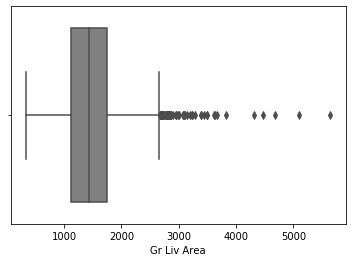

In [108]:
# Plot boxplot for Gr Liv Area
sns.boxplot(train_test['Gr Liv Area'],color='grey');


To return observations with  Gr Liv Area of extreme outliers (determined visually from boxplot above)> 4500

In [109]:
# Filter ['Gr Liv Area']>4500 to check for outliers
train_test.loc[train_test['Gr Liv Area']>4500,['Id','Gr Liv Area','Garage Area','Total Bsmt SF','1st Flr SF','TotRms AbvGrd','Mas Vnr Area','Fireplaces','train']]

,Id,Gr Liv Area,Garage Area,Total Bsmt SF,1st Flr SF,TotRms AbvGrd,Mas Vnr Area,Fireplaces,train
960,1499,5642,1418.0,6110.0,4692,12,796.0,3,1
1884,2181,5095,1154.0,5095.0,5095,15,1224.0,2,1
76,2182,4676,884.0,3138.0,3138,11,762.0,1,0


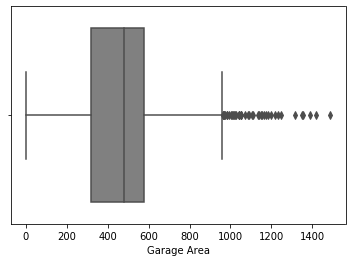

In [110]:
# Plot boxplot for Garage Area
sns.boxplot(train_test['Garage Area'],color='grey');


To return observations with  Garage Area of extreme outliers (determined visually from boxplot above)> 1100

In [111]:
# Filter ['Garage Area']>1100 to check for outliers
train_test.loc[train_test['Garage Area']>1100,['Id','Gr Liv Area','Garage Area','Total Bsmt SF','1st Flr SF','TotRms AbvGrd','Mas Vnr Area','Fireplaces','train']]

,Id,Gr Liv Area,Garage Area,Total Bsmt SF,1st Flr SF,TotRms AbvGrd,Mas Vnr Area,Fireplaces,train
81,367,2234,1166.0,2216.0,2234,9,748.0,1,1
332,1060,2790,1150.0,1620.0,1632,10,468.0,1,1
337,2283,1622,1356.0,1249.0,1622,7,149.0,1,1
682,1053,2084,1220.0,2078.0,2084,7,816.0,1,1
800,1702,2290,1174.0,2320.0,2290,7,970.0,1,1
925,747,1072,1184.0,1072.0,1072,5,0.0,0,1
960,1499,5642,1418.0,6110.0,4692,12,796.0,3,1
1060,819,1680,1138.0,1555.0,1680,8,242.0,1,1
1140,1853,2362,1105.0,1220.0,1220,8,0.0,2,1
1158,1426,2276,1348.0,2271.0,2276,7,554.0,2,1


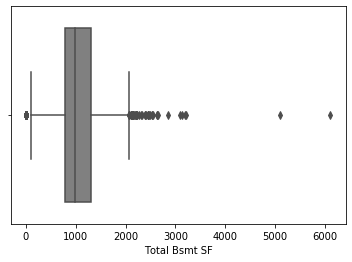

In [112]:
# Plot boxplot for Total Bsmt SF
sns.boxplot(train_test['Total Bsmt SF'],color='grey');


To return observations with  Total Bsmt SF of extreme outliers (determined visually from boxplot above)> 5000

In [113]:
# Filter ['Total Bsmt SF']>5000 to check for outliers
train_test.loc[train_test['Total Bsmt SF']>5000,['Id','Gr Liv Area','Garage Area','Total Bsmt SF','1st Flr SF','TotRms AbvGrd','Mas Vnr Area','Fireplaces','train']]

,Id,Gr Liv Area,Garage Area,Total Bsmt SF,1st Flr SF,TotRms AbvGrd,Mas Vnr Area,Fireplaces,train
960,1499,5642,1418.0,6110.0,4692,12,796.0,3,1
1884,2181,5095,1154.0,5095.0,5095,15,1224.0,2,1


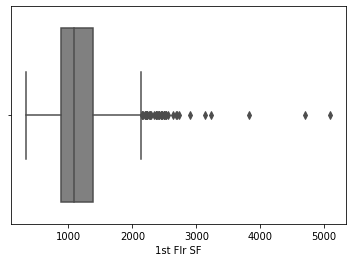

In [114]:
# Plot boxplot for '1st Flr SF'
sns.boxplot(train_test['1st Flr SF'],color='grey');


To return observations with 1st Flr SF of extreme outliers (determined visually from boxplot above)> 4000

In [115]:
# Filter ['1st Flr SF']>4000 to check for outliers
train_test.loc[train_test['1st Flr SF']>4000,['Id','Gr Liv Area','Garage Area','Total Bsmt SF','1st Flr SF','TotRms AbvGrd','Mas Vnr Area','Fireplaces','train']]

,Id,Gr Liv Area,Garage Area,Total Bsmt SF,1st Flr SF,TotRms AbvGrd,Mas Vnr Area,Fireplaces,train
960,1499,5642,1418.0,6110.0,4692,12,796.0,3,1
1884,2181,5095,1154.0,5095.0,5095,15,1224.0,2,1


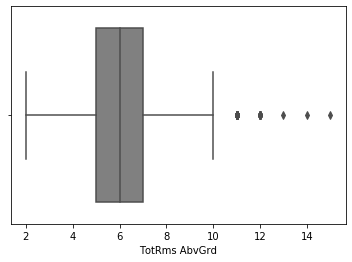

In [116]:
# Plot boxplot for TotRms AbvGrd
sns.boxplot(train_test['TotRms AbvGrd'],color='grey');


To return observations with TotRms AbvGrd of extreme outliers (determined visually from boxplot above)>11

In [117]:
# Filter ['TotRms AbvGrd']>11 to check for outliers
train_test.loc[train_test['TotRms AbvGrd']>11,['Id','Gr Liv Area','Garage Area','Total Bsmt SF','1st Flr SF','TotRms AbvGrd','Mas Vnr Area','Fireplaces','train']]

,Id,Gr Liv Area,Garage Area,Total Bsmt SF,1st Flr SF,TotRms AbvGrd,Mas Vnr Area,Fireplaces,train
52,2351,2784,564.0,1392.0,1392,12,184.0,2,1
78,136,2274,480.0,1105.0,1105,12,361.0,0,1
194,670,2634,968.0,1248.0,1338,12,368.0,0,1
562,187,2256,0.0,840.0,1128,12,0.0,0,1
765,1862,2620,600.0,1361.0,1361,12,1.0,1,1
823,16,3279,841.0,1650.0,1690,12,603.0,1,1
858,2195,3395,0.0,1440.0,1440,14,0.0,0,1
960,1499,5642,1418.0,6110.0,4692,12,796.0,3,1
1035,2667,3608,840.0,1107.0,1518,12,0.0,2,1
1256,813,2240,528.0,0.0,1120,12,0.0,0,1


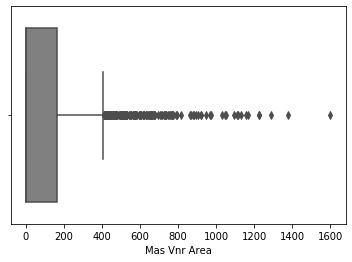

In [118]:
# Plot boxplot for Mas Vnr Area
sns.boxplot(train_test['Mas Vnr Area'],color='grey');


To return observations with Mas Vnr Area of extreme outliers (determined visually from boxplot above)>1200

In [119]:
# Filter ['Mas Vnr Area']>1200 to check for outliers
train_test.loc[train_test['Mas Vnr Area']>1200,['Id','Gr Liv Area','Garage Area','Total Bsmt SF','1st Flr SF','TotRms AbvGrd','Mas Vnr Area','Fireplaces','train']]

,Id,Gr Liv Area,Garage Area,Total Bsmt SF,1st Flr SF,TotRms AbvGrd,Mas Vnr Area,Fireplaces,train
1409,1850,1950,576.0,975.0,975,7,1600.0,1,1
1884,2181,5095,1154.0,5095.0,5095,15,1224.0,2,1
116,2446,3627,807.0,1930.0,1831,10,1378.0,1,0
260,2259,2279,461.0,585.0,2279,7,1224.0,1,0
552,1099,2199,516.0,1173.0,1182,9,1290.0,1,0


Upon plotting box plot for, Gr Liv Area, Garage Area,Total Bsmt SF,1st Flr SF,Property Age,Year Built,TotRms AbvGrd and Mas Vnr Area, there are 2 rows appeared to be the outliers for most of the features.<br>
The 2 rows are with ID 2181,1499. Both are from Train dataset.

In [120]:
# Check shape
train_test.shape

(2929, 234)

In [121]:
# drop row with Id 2181
train_test.drop(train[train.Id==2181].index,inplace=True)

In [122]:
# drop row with Id 1499
train_test.drop(train[train.Id==1499].index,inplace=True)

In [123]:
# Check shape
train_test.shape

(2927, 234)

# Split train_test Dataset into train_final and test_final and Export to csv

In [124]:
# Check tail
train_test.tail()

,Id,PID,Overall Qual*Exter Qual,Lot Area*Remodel Age,Property Age*Lot Area,Gr Liv Area*TotRms AbvGrd,Exter Qual,Exter Cond,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin Type 2,Heating QC,Kitchen Qual,Fireplace Qu,Garage Qual,Garage Cond,Pool QC,Overall Cond,Overall Qual,1st Flr SF,2nd Flr SF,3Ssn Porch,Bedroom AbvGr,Bsmt Full Bath,Bsmt Half Bath,Bsmt Unf SF,BsmtFin SF 1,BsmtFin SF 2,Central Air,Enclosed Porch,Fireplaces,Full Bath,Garage Area,Garage Cars,Garage Yr Blt,Gr Liv Area,Half Bath,Kitchen AbvGr,Lot Area,Lot Frontage,Low Qual Fin SF,MS SubClass,Mas Vnr Area,Misc Val,Mo Sold,Open Porch SF,Pool Area,Screen Porch,TotRms AbvGrd,Total Bsmt SF,Wood Deck SF,Year Built,Year Remod/Add,Yr Sold,train,Property Age,Remodel Age,Remod/Add,lot_config_CulDSac,lot_config_FR2,lot_config_FR3,lot_config_Inside,zon_C (all),zon_FV,zon_I (all),zon_RH,zon_RL,zon_RM,rd_access_Pave,al_access_Grvl,al_access_Pave,prop_shape_IR2,prop_shape_IR3,prop_shape_Reg,prop_flatness_HLS,prop_flatness_Low,prop_flatness_Lvl,utility_NoSeWa,utility_NoSewr,prop_slope_Mod,prop_slope_Sev,neigh_Blueste,neigh_BrDale,neigh_BrkSide,neigh_ClearCr,neigh_CollgCr,neigh_Crawfor,neigh_Edwards,neigh_Gilbert,neigh_Greens,neigh_GrnHill,neigh_IDOTRR,neigh_Landmrk,neigh_MeadowV,neigh_Mitchel,neigh_NAmes,neigh_NPkVill,neigh_NWAmes,neigh_NoRidge,neigh_NridgHt,neigh_OldTown,neigh_SWISU,neigh_Sawyer,neigh_SawyerW,neigh_Somerst,neigh_StoneBr,neigh_Timber,neigh_Veenker,proxi_1_Feedr,proxi_1_Norm,proxi_1_PosA,proxi_1_PosN,proxi_1_RRAe,proxi_1_RRAn,proxi_1_RRNe,proxi_1_RRNn,promxi_2_Feedr,promxi_2_Norm,promxi_2_PosA,promxi_2_PosN,promxi_2_RRAe,promxi_2_RRAn,promxi_2_RRNn,bldg_type_2fmCon,bldg_type_Duplex,bldg_type_Twnhs,bldg_type_TwnhsE,hse_style_1.5Unf,hse_style_1Story,hse_style_2.5Fin,hse_style_2.5Unf,hse_style_2Story,hse_style_SFoyer,hse_style_SLvl,r_style_Gable,r_style_Gambrel,r_style_Hip,r_style_Mansard,r_style_Shed,r_mat_CompShg,r_mat_Membran,r_mat_Metal,r_mat_Roll,r_mat_Tar&Grv,r_mat_WdShake,r_mat_WdShngl,ex_1_AsphShn,ex_1_BrkComm,ex_1_BrkFace,ex_1_CBlock,ex_1_CemntBd,ex_1_HdBoard,ex_1_ImStucc,ex_1_MetalSd,ex_1_Plywood,ex_1_PreCast,ex_1_Stone,ex_1_Stucco,ex_1_VinylSd,ex_1_Wd Sdng,ex_1_WdShing,ex_2_AsphShn,ex_2_Brk Cmn,ex_2_BrkFace,ex_2_CBlock,ex_2_CmentBd,ex_2_HdBoard,ex_2_ImStucc,ex_2_MetalSd,ex_2_Other,ex_2_Plywood,ex_2_PreCast,ex_2_Stone,ex_2_Stucco,ex_2_VinylSd,ex_2_Wd Sdng,ex_2_Wd Shng,mas_type_BrkFace,mas_type_CBlock,mas_type_None,mas_type_Stone,found__CBlock,found__PConc,found__Slab,found__Stone,found__Wood,heat__GasA,heat__GasW,heat__Grav,heat__OthW,heat__Wall,ele__FuseF,ele__FuseP,ele__Mix,ele__SBrkr,funct_Maj2,funct_Min1,funct_Min2,funct_Mod,funct_Sal,funct_Sev,funct_Typ,garage_ty_2Types,garage_ty_Attchd,garage_ty_Basment,garage_ty_BuiltIn,garage_ty_CarPort,garage_ty_Detchd,garage_fin_Fin,garage_fin_RFn,garage_fin_Unf,paved_dr_P,paved_dr_Y,fence_GdPrv,fence_GdWo,fence_MnPrv,fence_MnWw,misc_Elev,misc_Gar2,misc_Othr,misc_Shed,misc_TenC,sale_type_CWD,sale_type_Con,sale_type_ConLD,sale_type_ConLI,sale_type_ConLw,sale_type_New,sale_type_Oth,sale_type_VWD,sale_type_WD,SalePrice
874,1662,527377110,18,264000,264000,15016,3,3,3,3,1,5,2,3,3,3,3,3,0,6,6,1084,793,0,4,1.0,0.0,0.0,931.0,153.0,1,0,1,2,488.0,2.0,1974.0,1877,1,1,8000,80.0,0,60,0.0,0,11,96,0,0,8,1084.0,0,1974,1974,2007,0,33,33,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,NaN
875,1234,535126140,24,132030,616140,17892,4,4,3,3,1,4,1,5,4,4,3,3,0,7,6,1104,884,0,4,0.0,0.0,529.0,575.0,0.0,1,0,1,2,480.0,2.0,1966.0,1988,1,1,14670,90.0,0,60,410.0,0,8,230,0,0,9,1104.0,0,1966,1999,2008,0,42,9,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0

Extract train data set and save as train_final csv file.

In [125]:
# check train data set shape
train[train['train']==1].shape

(2050, 82)

In [126]:
# Check train_test shape
train_test[train_test['train']==1].shape

(2048, 234)

In [127]:
# Extract train data set where 'train' column value=1
train_final=train_test[train_test['train']==1]

In [128]:
# check head to ensure 'train' column value =1
train_final.head()

,Id,PID,Overall Qual*Exter Qual,Lot Area*Remodel Age,Property Age*Lot Area,Gr Liv Area*TotRms AbvGrd,Exter Qual,Exter Cond,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin Type 2,Heating QC,Kitchen Qual,Fireplace Qu,Garage Qual,Garage Cond,Pool QC,Overall Cond,Overall Qual,1st Flr SF,2nd Flr SF,3Ssn Porch,Bedroom AbvGr,Bsmt Full Bath,Bsmt Half Bath,Bsmt Unf SF,BsmtFin SF 1,BsmtFin SF 2,Central Air,Enclosed Porch,Fireplaces,Full Bath,Garage Area,Garage Cars,Garage Yr Blt,Gr Liv Area,Half Bath,Kitchen AbvGr,Lot Area,Lot Frontage,Low Qual Fin SF,MS SubClass,Mas Vnr Area,Misc Val,Mo Sold,Open Porch SF,Pool Area,Screen Porch,TotRms AbvGrd,Total Bsmt SF,Wood Deck SF,Year Built,Year Remod/Add,Yr Sold,train,Property Age,Remodel Age,Remod/Add,lot_config_CulDSac,lot_config_FR2,lot_config_FR3,lot_config_Inside,zon_C (all),zon_FV,zon_I (all),zon_RH,zon_RL,zon_RM,rd_access_Pave,al_access_Grvl,al_access_Pave,prop_shape_IR2,prop_shape_IR3,prop_shape_Reg,prop_flatness_HLS,prop_flatness_Low,prop_flatness_Lvl,utility_NoSeWa,utility_NoSewr,prop_slope_Mod,prop_slope_Sev,neigh_Blueste,neigh_BrDale,neigh_BrkSide,neigh_ClearCr,neigh_CollgCr,neigh_Crawfor,neigh_Edwards,neigh_Gilbert,neigh_Greens,neigh_GrnHill,neigh_IDOTRR,neigh_Landmrk,neigh_MeadowV,neigh_Mitchel,neigh_NAmes,neigh_NPkVill,neigh_NWAmes,neigh_NoRidge,neigh_NridgHt,neigh_OldTown,neigh_SWISU,neigh_Sawyer,neigh_SawyerW,neigh_Somerst,neigh_StoneBr,neigh_Timber,neigh_Veenker,proxi_1_Feedr,proxi_1_Norm,proxi_1_PosA,proxi_1_PosN,proxi_1_RRAe,proxi_1_RRAn,proxi_1_RRNe,proxi_1_RRNn,promxi_2_Feedr,promxi_2_Norm,promxi_2_PosA,promxi_2_PosN,promxi_2_RRAe,promxi_2_RRAn,promxi_2_RRNn,bldg_type_2fmCon,bldg_type_Duplex,bldg_type_Twnhs,bldg_type_TwnhsE,hse_style_1.5Unf,hse_style_1Story,hse_style_2.5Fin,hse_style_2.5Unf,hse_style_2Story,hse_style_SFoyer,hse_style_SLvl,r_style_Gable,r_style_Gambrel,r_style_Hip,r_style_Mansard,r_style_Shed,r_mat_CompShg,r_mat_Membran,r_mat_Metal,r_mat_Roll,r_mat_Tar&Grv,r_mat_WdShake,r_mat_WdShngl,ex_1_AsphShn,ex_1_BrkComm,ex_1_BrkFace,ex_1_CBlock,ex_1_CemntBd,ex_1_HdBoard,ex_1_ImStucc,ex_1_MetalSd,ex_1_Plywood,ex_1_PreCast,ex_1_Stone,ex_1_Stucco,ex_1_VinylSd,ex_1_Wd Sdng,ex_1_WdShing,ex_2_AsphShn,ex_2_Brk Cmn,ex_2_BrkFace,ex_2_CBlock,ex_2_CmentBd,ex_2_HdBoard,ex_2_ImStucc,ex_2_MetalSd,ex_2_Other,ex_2_Plywood,ex_2_PreCast,ex_2_Stone,ex_2_Stucco,ex_2_VinylSd,ex_2_Wd Sdng,ex_2_Wd Shng,mas_type_BrkFace,mas_type_CBlock,mas_type_None,mas_type_Stone,found__CBlock,found__PConc,found__Slab,found__Stone,found__Wood,heat__GasA,heat__GasW,heat__Grav,heat__OthW,heat__Wall,ele__FuseF,ele__FuseP,ele__Mix,ele__SBrkr,funct_Maj2,funct_Min1,funct_Min2,funct_Mod,funct_Sal,funct_Sev,funct_Typ,garage_ty_2Types,garage_ty_Attchd,garage_ty_Basment,garage_ty_BuiltIn,garage_ty_CarPort,garage_ty_Detchd,garage_fin_Fin,garage_fin_RFn,garage_fin_Unf,paved_dr_P,paved_dr_Y,fence_GdPrv,fence_GdWo,fence_MnPrv,fence_MnWw,misc_Elev,misc_Gar2,misc_Othr,misc_Shed,misc_TenC,sale_type_CWD,sale_type_Con,sale_type_ConLD,sale_type_ConLI,sale_type_ConLw,sale_type_New,sale_type_Oth,sale_type_VWD,sale_type_WD,SalePrice
0,109,533352170,24,67585,459578,8874,4,3,3,3,1,6,1,5,4,0,3,3,0,8,6,725,754,0,3,0.0,0.0,192.0,533.0,0.0,1,0,0,2,475.0,2.0,1976.0,1479,1,1,13517,68.0,0,60,289.0,0,3,44,0,0,6,725.0,0,1976,2005,2010,1,34,5,1,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,130500.0
1,544,531379050,28,137904,149396,16976,4,3,4,3,1,6,1,5,4,3,3,3,0,5,7,913,1209,0,4,1.0,0.0,276.0,637.0,0.0,1,0,1,2,559.0,2.0,1997.0,2122,1,1,11492,43.0,0,60,132.0,0,4,74,0,0,8,913.0,0,1996,1997,2009,1,13,12,1,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,

In [129]:
# check tail to ensure 'train' column value =1
train_final.tail()

,Id,PID,Overall Qual*Exter Qual,Lot Area*Remodel Age,Property Age*Lot Area,Gr Liv Area*TotRms AbvGrd,Exter Qual,Exter Cond,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin Type 2,Heating QC,Kitchen Qual,Fireplace Qu,Garage Qual,Garage Cond,Pool QC,Overall Cond,Overall Qual,1st Flr SF,2nd Flr SF,3Ssn Porch,Bedroom AbvGr,Bsmt Full Bath,Bsmt Half Bath,Bsmt Unf SF,BsmtFin SF 1,BsmtFin SF 2,Central Air,Enclosed Porch,Fireplaces,Full Bath,Garage Area,Garage Cars,Garage Yr Blt,Gr Liv Area,Half Bath,Kitchen AbvGr,Lot Area,Lot Frontage,Low Qual Fin SF,MS SubClass,Mas Vnr Area,Misc Val,Mo Sold,Open Porch SF,Pool Area,Screen Porch,TotRms AbvGrd,Total Bsmt SF,Wood Deck SF,Year Built,Year Remod/Add,Yr Sold,train,Property Age,Remodel Age,Remod/Add,lot_config_CulDSac,lot_config_FR2,lot_config_FR3,lot_config_Inside,zon_C (all),zon_FV,zon_I (all),zon_RH,zon_RL,zon_RM,rd_access_Pave,al_access_Grvl,al_access_Pave,prop_shape_IR2,prop_shape_IR3,prop_shape_Reg,prop_flatness_HLS,prop_flatness_Low,prop_flatness_Lvl,utility_NoSeWa,utility_NoSewr,prop_slope_Mod,prop_slope_Sev,neigh_Blueste,neigh_BrDale,neigh_BrkSide,neigh_ClearCr,neigh_CollgCr,neigh_Crawfor,neigh_Edwards,neigh_Gilbert,neigh_Greens,neigh_GrnHill,neigh_IDOTRR,neigh_Landmrk,neigh_MeadowV,neigh_Mitchel,neigh_NAmes,neigh_NPkVill,neigh_NWAmes,neigh_NoRidge,neigh_NridgHt,neigh_OldTown,neigh_SWISU,neigh_Sawyer,neigh_SawyerW,neigh_Somerst,neigh_StoneBr,neigh_Timber,neigh_Veenker,proxi_1_Feedr,proxi_1_Norm,proxi_1_PosA,proxi_1_PosN,proxi_1_RRAe,proxi_1_RRAn,proxi_1_RRNe,proxi_1_RRNn,promxi_2_Feedr,promxi_2_Norm,promxi_2_PosA,promxi_2_PosN,promxi_2_RRAe,promxi_2_RRAn,promxi_2_RRNn,bldg_type_2fmCon,bldg_type_Duplex,bldg_type_Twnhs,bldg_type_TwnhsE,hse_style_1.5Unf,hse_style_1Story,hse_style_2.5Fin,hse_style_2.5Unf,hse_style_2Story,hse_style_SFoyer,hse_style_SLvl,r_style_Gable,r_style_Gambrel,r_style_Hip,r_style_Mansard,r_style_Shed,r_mat_CompShg,r_mat_Membran,r_mat_Metal,r_mat_Roll,r_mat_Tar&Grv,r_mat_WdShake,r_mat_WdShngl,ex_1_AsphShn,ex_1_BrkComm,ex_1_BrkFace,ex_1_CBlock,ex_1_CemntBd,ex_1_HdBoard,ex_1_ImStucc,ex_1_MetalSd,ex_1_Plywood,ex_1_PreCast,ex_1_Stone,ex_1_Stucco,ex_1_VinylSd,ex_1_Wd Sdng,ex_1_WdShing,ex_2_AsphShn,ex_2_Brk Cmn,ex_2_BrkFace,ex_2_CBlock,ex_2_CmentBd,ex_2_HdBoard,ex_2_ImStucc,ex_2_MetalSd,ex_2_Other,ex_2_Plywood,ex_2_PreCast,ex_2_Stone,ex_2_Stucco,ex_2_VinylSd,ex_2_Wd Sdng,ex_2_Wd Shng,mas_type_BrkFace,mas_type_CBlock,mas_type_None,mas_type_Stone,found__CBlock,found__PConc,found__Slab,found__Stone,found__Wood,heat__GasA,heat__GasW,heat__Grav,heat__OthW,heat__Wall,ele__FuseF,ele__FuseP,ele__Mix,ele__SBrkr,funct_Maj2,funct_Min1,funct_Min2,funct_Mod,funct_Sal,funct_Sev,funct_Typ,garage_ty_2Types,garage_ty_Attchd,garage_ty_Basment,garage_ty_BuiltIn,garage_ty_CarPort,garage_ty_Detchd,garage_fin_Fin,garage_fin_RFn,garage_fin_Unf,paved_dr_P,paved_dr_Y,fence_GdPrv,fence_GdWo,fence_MnPrv,fence_MnWw,misc_Elev,misc_Gar2,misc_Othr,misc_Shed,misc_TenC,sale_type_CWD,sale_type_Con,sale_type_ConLD,sale_type_ConLI,sale_type_ConLw,sale_type_New,sale_type_Oth,sale_type_VWD,sale_type_WD,SalePrice
2045,1587,921126030,32,11449,11449,12096,4,3,4,3,3,6,1,5,4,4,3,3,0,5,8,1728,0,0,3,1.0,0.0,873.0,1011.0,0.0,1,0,1,2,520.0,2.0,2007.0,1728,0,1,11449,79.0,0,20,0.0,0,1,276,0,0,7,1884.0,0,2007,2007,2008,1,1,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,298751.0
2046,785,905377130,12,728178,851598,3444,3,3,3,3,1,4,1,5,3,0,3,3,0,5,4,861,0,0,1,0.0,0.0,599.0,262.0,0.0,1,0,0,1,539.0,2.0,1961.0,861,0,1,12342,68.0,0,30,0.0,0,3,0,0,0,4,861.0,158,1940,1950,2009,1,69,59,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,

In [130]:
# check shape
train_final.shape

(2048, 234)

In [131]:
# Delete the 'train' column created earlier
del train_final['train']

In [132]:
# Check shape
train_final.shape

(2048, 233)

In [133]:
# Check head
train_final.head(2)

,Id,PID,Overall Qual*Exter Qual,Lot Area*Remodel Age,Property Age*Lot Area,Gr Liv Area*TotRms AbvGrd,Exter Qual,Exter Cond,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin Type 2,Heating QC,Kitchen Qual,Fireplace Qu,Garage Qual,Garage Cond,Pool QC,Overall Cond,Overall Qual,1st Flr SF,2nd Flr SF,3Ssn Porch,Bedroom AbvGr,Bsmt Full Bath,Bsmt Half Bath,Bsmt Unf SF,BsmtFin SF 1,BsmtFin SF 2,Central Air,Enclosed Porch,Fireplaces,Full Bath,Garage Area,Garage Cars,Garage Yr Blt,Gr Liv Area,Half Bath,Kitchen AbvGr,Lot Area,Lot Frontage,Low Qual Fin SF,MS SubClass,Mas Vnr Area,Misc Val,Mo Sold,Open Porch SF,Pool Area,Screen Porch,TotRms AbvGrd,Total Bsmt SF,Wood Deck SF,Year Built,Year Remod/Add,Yr Sold,Property Age,Remodel Age,Remod/Add,lot_config_CulDSac,lot_config_FR2,lot_config_FR3,lot_config_Inside,zon_C (all),zon_FV,zon_I (all),zon_RH,zon_RL,zon_RM,rd_access_Pave,al_access_Grvl,al_access_Pave,prop_shape_IR2,prop_shape_IR3,prop_shape_Reg,prop_flatness_HLS,prop_flatness_Low,prop_flatness_Lvl,utility_NoSeWa,utility_NoSewr,prop_slope_Mod,prop_slope_Sev,neigh_Blueste,neigh_BrDale,neigh_BrkSide,neigh_ClearCr,neigh_CollgCr,neigh_Crawfor,neigh_Edwards,neigh_Gilbert,neigh_Greens,neigh_GrnHill,neigh_IDOTRR,neigh_Landmrk,neigh_MeadowV,neigh_Mitchel,neigh_NAmes,neigh_NPkVill,neigh_NWAmes,neigh_NoRidge,neigh_NridgHt,neigh_OldTown,neigh_SWISU,neigh_Sawyer,neigh_SawyerW,neigh_Somerst,neigh_StoneBr,neigh_Timber,neigh_Veenker,proxi_1_Feedr,proxi_1_Norm,proxi_1_PosA,proxi_1_PosN,proxi_1_RRAe,proxi_1_RRAn,proxi_1_RRNe,proxi_1_RRNn,promxi_2_Feedr,promxi_2_Norm,promxi_2_PosA,promxi_2_PosN,promxi_2_RRAe,promxi_2_RRAn,promxi_2_RRNn,bldg_type_2fmCon,bldg_type_Duplex,bldg_type_Twnhs,bldg_type_TwnhsE,hse_style_1.5Unf,hse_style_1Story,hse_style_2.5Fin,hse_style_2.5Unf,hse_style_2Story,hse_style_SFoyer,hse_style_SLvl,r_style_Gable,r_style_Gambrel,r_style_Hip,r_style_Mansard,r_style_Shed,r_mat_CompShg,r_mat_Membran,r_mat_Metal,r_mat_Roll,r_mat_Tar&Grv,r_mat_WdShake,r_mat_WdShngl,ex_1_AsphShn,ex_1_BrkComm,ex_1_BrkFace,ex_1_CBlock,ex_1_CemntBd,ex_1_HdBoard,ex_1_ImStucc,ex_1_MetalSd,ex_1_Plywood,ex_1_PreCast,ex_1_Stone,ex_1_Stucco,ex_1_VinylSd,ex_1_Wd Sdng,ex_1_WdShing,ex_2_AsphShn,ex_2_Brk Cmn,ex_2_BrkFace,ex_2_CBlock,ex_2_CmentBd,ex_2_HdBoard,ex_2_ImStucc,ex_2_MetalSd,ex_2_Other,ex_2_Plywood,ex_2_PreCast,ex_2_Stone,ex_2_Stucco,ex_2_VinylSd,ex_2_Wd Sdng,ex_2_Wd Shng,mas_type_BrkFace,mas_type_CBlock,mas_type_None,mas_type_Stone,found__CBlock,found__PConc,found__Slab,found__Stone,found__Wood,heat__GasA,heat__GasW,heat__Grav,heat__OthW,heat__Wall,ele__FuseF,ele__FuseP,ele__Mix,ele__SBrkr,funct_Maj2,funct_Min1,funct_Min2,funct_Mod,funct_Sal,funct_Sev,funct_Typ,garage_ty_2Types,garage_ty_Attchd,garage_ty_Basment,garage_ty_BuiltIn,garage_ty_CarPort,garage_ty_Detchd,garage_fin_Fin,garage_fin_RFn,garage_fin_Unf,paved_dr_P,paved_dr_Y,fence_GdPrv,fence_GdWo,fence_MnPrv,fence_MnWw,misc_Elev,misc_Gar2,misc_Othr,misc_Shed,misc_TenC,sale_type_CWD,sale_type_Con,sale_type_ConLD,sale_type_ConLI,sale_type_ConLw,sale_type_New,sale_type_Oth,sale_type_VWD,sale_type_WD,SalePrice
0,109,533352170,24,67585,459578,8874,4,3,3,3,1,6,1,5,4,0,3,3,0,8,6,725,754,0,3,0.0,0.0,192.0,533.0,0.0,1,0,0,2,475.0,2.0,1976.0,1479,1,1,13517,68.0,0,60,289.0,0,3,44,0,0,6,725.0,0,1976,2005,2010,34,5,1,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,130500.0
1,544,531379050,28,137904,149396,16976,4,3,4,3,1,6,1,5,4,3,3,3,0,5,7,913,1209,0,4,1.0,0.0,276.0,637.0,0.0,1,0,1,2,559.0,2.0,1997.0,2122,1,1,11492,43.0,0,60,132.0,0,4,74,0,0,8,913.0,0,1996,1997,2009,13,12,1,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,

In [134]:

# This cell is commented off to prevent multiple csv file generation when running all cells
# Export train_final to csv file.
# train_final.to_csv('train_final.csv',index=False)

Extract test data set and save as test_final csv file.

In [135]:
# check test data set shape
test_clean[test_clean['train']==0].shape

(879, 81)

In [136]:
# Check train_test shape
train_test[train_test['train']==0].shape

(879, 234)

In [137]:
# Extract test data set where 'train' column value=0
test_final=train_test[train_test['train']==0]

In [138]:
# check shape
test_final.shape

(879, 234)

In [139]:
# Delete the 'train' column created earlier
del test_final['train']

In [140]:
# Check shape
test_final.shape

(879, 233)

In [141]:
# Check head
test_final.head(2)

,Id,PID,Overall Qual*Exter Qual,Lot Area*Remodel Age,Property Age*Lot Area,Gr Liv Area*TotRms AbvGrd,Exter Qual,Exter Cond,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin Type 2,Heating QC,Kitchen Qual,Fireplace Qu,Garage Qual,Garage Cond,Pool QC,Overall Cond,Overall Qual,1st Flr SF,2nd Flr SF,3Ssn Porch,Bedroom AbvGr,Bsmt Full Bath,Bsmt Half Bath,Bsmt Unf SF,BsmtFin SF 1,BsmtFin SF 2,Central Air,Enclosed Porch,Fireplaces,Full Bath,Garage Area,Garage Cars,Garage Yr Blt,Gr Liv Area,Half Bath,Kitchen AbvGr,Lot Area,Lot Frontage,Low Qual Fin SF,MS SubClass,Mas Vnr Area,Misc Val,Mo Sold,Open Porch SF,Pool Area,Screen Porch,TotRms AbvGrd,Total Bsmt SF,Wood Deck SF,Year Built,Year Remod/Add,Yr Sold,Property Age,Remodel Age,Remod/Add,lot_config_CulDSac,lot_config_FR2,lot_config_FR3,lot_config_Inside,zon_C (all),zon_FV,zon_I (all),zon_RH,zon_RL,zon_RM,rd_access_Pave,al_access_Grvl,al_access_Pave,prop_shape_IR2,prop_shape_IR3,prop_shape_Reg,prop_flatness_HLS,prop_flatness_Low,prop_flatness_Lvl,utility_NoSeWa,utility_NoSewr,prop_slope_Mod,prop_slope_Sev,neigh_Blueste,neigh_BrDale,neigh_BrkSide,neigh_ClearCr,neigh_CollgCr,neigh_Crawfor,neigh_Edwards,neigh_Gilbert,neigh_Greens,neigh_GrnHill,neigh_IDOTRR,neigh_Landmrk,neigh_MeadowV,neigh_Mitchel,neigh_NAmes,neigh_NPkVill,neigh_NWAmes,neigh_NoRidge,neigh_NridgHt,neigh_OldTown,neigh_SWISU,neigh_Sawyer,neigh_SawyerW,neigh_Somerst,neigh_StoneBr,neigh_Timber,neigh_Veenker,proxi_1_Feedr,proxi_1_Norm,proxi_1_PosA,proxi_1_PosN,proxi_1_RRAe,proxi_1_RRAn,proxi_1_RRNe,proxi_1_RRNn,promxi_2_Feedr,promxi_2_Norm,promxi_2_PosA,promxi_2_PosN,promxi_2_RRAe,promxi_2_RRAn,promxi_2_RRNn,bldg_type_2fmCon,bldg_type_Duplex,bldg_type_Twnhs,bldg_type_TwnhsE,hse_style_1.5Unf,hse_style_1Story,hse_style_2.5Fin,hse_style_2.5Unf,hse_style_2Story,hse_style_SFoyer,hse_style_SLvl,r_style_Gable,r_style_Gambrel,r_style_Hip,r_style_Mansard,r_style_Shed,r_mat_CompShg,r_mat_Membran,r_mat_Metal,r_mat_Roll,r_mat_Tar&Grv,r_mat_WdShake,r_mat_WdShngl,ex_1_AsphShn,ex_1_BrkComm,ex_1_BrkFace,ex_1_CBlock,ex_1_CemntBd,ex_1_HdBoard,ex_1_ImStucc,ex_1_MetalSd,ex_1_Plywood,ex_1_PreCast,ex_1_Stone,ex_1_Stucco,ex_1_VinylSd,ex_1_Wd Sdng,ex_1_WdShing,ex_2_AsphShn,ex_2_Brk Cmn,ex_2_BrkFace,ex_2_CBlock,ex_2_CmentBd,ex_2_HdBoard,ex_2_ImStucc,ex_2_MetalSd,ex_2_Other,ex_2_Plywood,ex_2_PreCast,ex_2_Stone,ex_2_Stucco,ex_2_VinylSd,ex_2_Wd Sdng,ex_2_Wd Shng,mas_type_BrkFace,mas_type_CBlock,mas_type_None,mas_type_Stone,found__CBlock,found__PConc,found__Slab,found__Stone,found__Wood,heat__GasA,heat__GasW,heat__Grav,heat__OthW,heat__Wall,ele__FuseF,ele__FuseP,ele__Mix,ele__SBrkr,funct_Maj2,funct_Min1,funct_Min2,funct_Mod,funct_Sal,funct_Sev,funct_Typ,garage_ty_2Types,garage_ty_Attchd,garage_ty_Basment,garage_ty_BuiltIn,garage_ty_CarPort,garage_ty_Detchd,garage_fin_Fin,garage_fin_RFn,garage_fin_Unf,paved_dr_P,paved_dr_Y,fence_GdPrv,fence_GdWo,fence_MnPrv,fence_MnWw,misc_Elev,misc_Gar2,misc_Othr,misc_Shed,misc_TenC,sale_type_CWD,sale_type_Con,sale_type_ConLD,sale_type_ConLI,sale_type_ConLw,sale_type_New,sale_type_Oth,sale_type_VWD,sale_type_WD,SalePrice
0,2658,902301120,18,511952,877632,17352,3,2,2,3,1,1,1,4,2,0,1,1,0,8,6,908,1020,0,4,0.0,0.0,1020.0,0.0,0.0,0,112,0,2,440.0,1.0,1910.0,1928,0,2,9142,69.0,0,190,0.0,0,4,60,0,0,9,1020.0,0,1910,1950,2006,96,56,1,0,0,0,1,0,0,0,0,0,1,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,NaN
1,2718,905108090,15,280198,280198,19670,3,3,4,3,1,1,1,3,3,0,3,3,0,4,5,1967,0,0,6,0.0,0.0,1967.0,0.0,0.0,1,0,0,2,580.0,2.0,1977.0,1967,0,2,9662,68.0,0,90,0.0,0,8,0,0,0,10,1967.0,170,1977,1977,2006,29,29,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,

In [142]:

# This cell is commented off to prevent multiple csv file generation when running all cells
# Export test_final to csv file.
#test_final.to_csv('test_final.csv',index=False)

# Feature Selection: Filtering method


In [143]:
train_final.head(2)

,Id,PID,Overall Qual*Exter Qual,Lot Area*Remodel Age,Property Age*Lot Area,Gr Liv Area*TotRms AbvGrd,Exter Qual,Exter Cond,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin Type 2,Heating QC,Kitchen Qual,Fireplace Qu,Garage Qual,Garage Cond,Pool QC,Overall Cond,Overall Qual,1st Flr SF,2nd Flr SF,3Ssn Porch,Bedroom AbvGr,Bsmt Full Bath,Bsmt Half Bath,Bsmt Unf SF,BsmtFin SF 1,BsmtFin SF 2,Central Air,Enclosed Porch,Fireplaces,Full Bath,Garage Area,Garage Cars,Garage Yr Blt,Gr Liv Area,Half Bath,Kitchen AbvGr,Lot Area,Lot Frontage,Low Qual Fin SF,MS SubClass,Mas Vnr Area,Misc Val,Mo Sold,Open Porch SF,Pool Area,Screen Porch,TotRms AbvGrd,Total Bsmt SF,Wood Deck SF,Year Built,Year Remod/Add,Yr Sold,Property Age,Remodel Age,Remod/Add,lot_config_CulDSac,lot_config_FR2,lot_config_FR3,lot_config_Inside,zon_C (all),zon_FV,zon_I (all),zon_RH,zon_RL,zon_RM,rd_access_Pave,al_access_Grvl,al_access_Pave,prop_shape_IR2,prop_shape_IR3,prop_shape_Reg,prop_flatness_HLS,prop_flatness_Low,prop_flatness_Lvl,utility_NoSeWa,utility_NoSewr,prop_slope_Mod,prop_slope_Sev,neigh_Blueste,neigh_BrDale,neigh_BrkSide,neigh_ClearCr,neigh_CollgCr,neigh_Crawfor,neigh_Edwards,neigh_Gilbert,neigh_Greens,neigh_GrnHill,neigh_IDOTRR,neigh_Landmrk,neigh_MeadowV,neigh_Mitchel,neigh_NAmes,neigh_NPkVill,neigh_NWAmes,neigh_NoRidge,neigh_NridgHt,neigh_OldTown,neigh_SWISU,neigh_Sawyer,neigh_SawyerW,neigh_Somerst,neigh_StoneBr,neigh_Timber,neigh_Veenker,proxi_1_Feedr,proxi_1_Norm,proxi_1_PosA,proxi_1_PosN,proxi_1_RRAe,proxi_1_RRAn,proxi_1_RRNe,proxi_1_RRNn,promxi_2_Feedr,promxi_2_Norm,promxi_2_PosA,promxi_2_PosN,promxi_2_RRAe,promxi_2_RRAn,promxi_2_RRNn,bldg_type_2fmCon,bldg_type_Duplex,bldg_type_Twnhs,bldg_type_TwnhsE,hse_style_1.5Unf,hse_style_1Story,hse_style_2.5Fin,hse_style_2.5Unf,hse_style_2Story,hse_style_SFoyer,hse_style_SLvl,r_style_Gable,r_style_Gambrel,r_style_Hip,r_style_Mansard,r_style_Shed,r_mat_CompShg,r_mat_Membran,r_mat_Metal,r_mat_Roll,r_mat_Tar&Grv,r_mat_WdShake,r_mat_WdShngl,ex_1_AsphShn,ex_1_BrkComm,ex_1_BrkFace,ex_1_CBlock,ex_1_CemntBd,ex_1_HdBoard,ex_1_ImStucc,ex_1_MetalSd,ex_1_Plywood,ex_1_PreCast,ex_1_Stone,ex_1_Stucco,ex_1_VinylSd,ex_1_Wd Sdng,ex_1_WdShing,ex_2_AsphShn,ex_2_Brk Cmn,ex_2_BrkFace,ex_2_CBlock,ex_2_CmentBd,ex_2_HdBoard,ex_2_ImStucc,ex_2_MetalSd,ex_2_Other,ex_2_Plywood,ex_2_PreCast,ex_2_Stone,ex_2_Stucco,ex_2_VinylSd,ex_2_Wd Sdng,ex_2_Wd Shng,mas_type_BrkFace,mas_type_CBlock,mas_type_None,mas_type_Stone,found__CBlock,found__PConc,found__Slab,found__Stone,found__Wood,heat__GasA,heat__GasW,heat__Grav,heat__OthW,heat__Wall,ele__FuseF,ele__FuseP,ele__Mix,ele__SBrkr,funct_Maj2,funct_Min1,funct_Min2,funct_Mod,funct_Sal,funct_Sev,funct_Typ,garage_ty_2Types,garage_ty_Attchd,garage_ty_Basment,garage_ty_BuiltIn,garage_ty_CarPort,garage_ty_Detchd,garage_fin_Fin,garage_fin_RFn,garage_fin_Unf,paved_dr_P,paved_dr_Y,fence_GdPrv,fence_GdWo,fence_MnPrv,fence_MnWw,misc_Elev,misc_Gar2,misc_Othr,misc_Shed,misc_TenC,sale_type_CWD,sale_type_Con,sale_type_ConLD,sale_type_ConLI,sale_type_ConLw,sale_type_New,sale_type_Oth,sale_type_VWD,sale_type_WD,SalePrice
0,109,533352170,24,67585,459578,8874,4,3,3,3,1,6,1,5,4,0,3,3,0,8,6,725,754,0,3,0.0,0.0,192.0,533.0,0.0,1,0,0,2,475.0,2.0,1976.0,1479,1,1,13517,68.0,0,60,289.0,0,3,44,0,0,6,725.0,0,1976,2005,2010,34,5,1,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,130500.0
1,544,531379050,28,137904,149396,16976,4,3,4,3,1,6,1,5,4,3,3,3,0,5,7,913,1209,0,4,1.0,0.0,276.0,637.0,0.0,1,0,1,2,559.0,2.0,1997.0,2122,1,1,11492,43.0,0,60,132.0,0,4,74,0,0,8,913.0,0,1996,1997,2009,13,12,1,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,

In [144]:
col_create_df=train_final.iloc[:,2:6]
col_create_df.head(2)

,Overall Qual*Exter Qual,Lot Area*Remodel Age,Property Age*Lot Area,Gr Liv Area*TotRms AbvGrd
0,24,67585,459578,8874
1,28,137904,149396,16976


In [145]:
col_ordinal_df=train_final.iloc[:,6:21]
col_ordinal_df.head(2)

,Exter Qual,Exter Cond,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin Type 2,Heating QC,Kitchen Qual,Fireplace Qu,Garage Qual,Garage Cond,Pool QC,Overall Cond,Overall Qual
0,4,3,3,3,1,6,1,5,4,0,3,3,0,8,6
1,4,3,4,3,1,6,1,5,4,3,3,3,0,5,7


In [146]:
col_dummy_df=train_final.iloc[:,59:232]
col_dummy_df.head(2)

,lot_config_CulDSac,lot_config_FR2,lot_config_FR3,lot_config_Inside,zon_C (all),zon_FV,zon_I (all),zon_RH,zon_RL,zon_RM,rd_access_Pave,al_access_Grvl,al_access_Pave,prop_shape_IR2,prop_shape_IR3,prop_shape_Reg,prop_flatness_HLS,prop_flatness_Low,prop_flatness_Lvl,utility_NoSeWa,utility_NoSewr,prop_slope_Mod,prop_slope_Sev,neigh_Blueste,neigh_BrDale,neigh_BrkSide,neigh_ClearCr,neigh_CollgCr,neigh_Crawfor,neigh_Edwards,neigh_Gilbert,neigh_Greens,neigh_GrnHill,neigh_IDOTRR,neigh_Landmrk,neigh_MeadowV,neigh_Mitchel,neigh_NAmes,neigh_NPkVill,neigh_NWAmes,neigh_NoRidge,neigh_NridgHt,neigh_OldTown,neigh_SWISU,neigh_Sawyer,neigh_SawyerW,neigh_Somerst,neigh_StoneBr,neigh_Timber,neigh_Veenker,proxi_1_Feedr,proxi_1_Norm,proxi_1_PosA,proxi_1_PosN,proxi_1_RRAe,proxi_1_RRAn,proxi_1_RRNe,proxi_1_RRNn,promxi_2_Feedr,promxi_2_Norm,promxi_2_PosA,promxi_2_PosN,promxi_2_RRAe,promxi_2_RRAn,promxi_2_RRNn,bldg_type_2fmCon,bldg_type_Duplex,bldg_type_Twnhs,bldg_type_TwnhsE,hse_style_1.5Unf,hse_style_1Story,hse_style_2.5Fin,hse_style_2.5Unf,hse_style_2Story,hse_style_SFoyer,hse_style_SLvl,r_style_Gable,r_style_Gambrel,r_style_Hip,r_style_Mansard,r_style_Shed,r_mat_CompShg,r_mat_Membran,r_mat_Metal,r_mat_Roll,r_mat_Tar&Grv,r_mat_WdShake,r_mat_WdShngl,ex_1_AsphShn,ex_1_BrkComm,ex_1_BrkFace,ex_1_CBlock,ex_1_CemntBd,ex_1_HdBoard,ex_1_ImStucc,ex_1_MetalSd,ex_1_Plywood,ex_1_PreCast,ex_1_Stone,ex_1_Stucco,ex_1_VinylSd,ex_1_Wd Sdng,ex_1_WdShing,ex_2_AsphShn,ex_2_Brk Cmn,ex_2_BrkFace,ex_2_CBlock,ex_2_CmentBd,ex_2_HdBoard,ex_2_ImStucc,ex_2_MetalSd,ex_2_Other,ex_2_Plywood,ex_2_PreCast,ex_2_Stone,ex_2_Stucco,ex_2_VinylSd,ex_2_Wd Sdng,ex_2_Wd Shng,mas_type_BrkFace,mas_type_CBlock,mas_type_None,mas_type_Stone,found__CBlock,found__PConc,found__Slab,found__Stone,found__Wood,heat__GasA,heat__GasW,heat__Grav,heat__OthW,heat__Wall,ele__FuseF,ele__FuseP,ele__Mix,ele__SBrkr,funct_Maj2,funct_Min1,funct_Min2,funct_Mod,funct_Sal,funct_Sev,funct_Typ,garage_ty_2Types,garage_ty_Attchd,garage_ty_Basment,garage_ty_BuiltIn,garage_ty_CarPort,garage_ty_Detchd,garage_fin_Fin,garage_fin_RFn,garage_fin_Unf,paved_dr_P,paved_dr_Y,fence_GdPrv,fence_GdWo,fence_MnPrv,fence_MnWw,misc_Elev,misc_Gar2,misc_Othr,misc_Shed,misc_TenC,sale_type_CWD,sale_type_Con,sale_type_ConLD,sale_type_ConLI,sale_type_ConLw,sale_type_New,sale_type_Oth,sale_type_VWD,sale_type_WD
0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [147]:
# Find out correlation in train_final databse
train_final_corr=train_final.corr()

In [148]:
columns_list=train_final.columns.to_list()
for c in enumerate (columns_list):
    print(c)

(0, 'Id')
(1, 'PID')
(2, 'Overall Qual*Exter Qual')
(3, 'Lot Area*Remodel Age')
(4, 'Property Age*Lot Area')
(5, 'Gr Liv Area*TotRms AbvGrd')
(6, 'Exter Qual')
(7, 'Exter Cond')
(8, 'Bsmt Qual')
(9, 'Bsmt Cond')
(10, 'Bsmt Exposure')
(11, 'BsmtFin Type 1')
(12, 'BsmtFin Type 2')
(13, 'Heating QC')
(14, 'Kitchen Qual')
(15, 'Fireplace Qu')
(16, 'Garage Qual')
(17, 'Garage Cond')
(18, 'Pool QC')
(19, 'Overall Cond')
(20, 'Overall Qual')
(21, '1st Flr SF')
(22, '2nd Flr SF')
(23, '3Ssn Porch')
(24, 'Bedroom AbvGr')
(25, 'Bsmt Full Bath')
(26, 'Bsmt Half Bath')
(27, 'Bsmt Unf SF')
(28, 'BsmtFin SF 1')
(29, 'BsmtFin SF 2')
(30, 'Central Air')
(31, 'Enclosed Porch')
(32, 'Fireplaces')
(33, 'Full Bath')
(34, 'Garage Area')
(35, 'Garage Cars')
(36, 'Garage Yr Blt')
(37, 'Gr Liv Area')
(38, 'Half Bath')
(39, 'Kitchen AbvGr')
(40, 'Lot Area')
(41, 'Lot Frontage')
(42, 'Low Qual Fin SF')
(43, 'MS SubClass')
(44, 'Mas Vnr Area')
(45, 'Misc Val')
(46, 'Mo Sold')
(47, 'Open Porch SF')
(48, 'Pool Are

In [149]:
# Find out correlation in train_final databse w/o dummy 
train_final_nodumm=train_final.iloc[:,3:59]
# train_final_nodumm.head(2)
col_at_end=['SalePrice']
train_final_nodumm_target=train_final[[c for c in train_final_nodumm if c in train_final]+
                                      [c for c in col_at_end if c in train_final]
                                     ]

#train_final_nodumm_target.head(2)
train_final_nodumm_target_corr=train_final_nodumm_target.corr()

In [150]:
# Find out correlation in train_final databse w/o dummy 
train_final_ordinal=train_final.iloc[:,6:21]
#train_final_ordinal.head(2)
col_at_end=['SalePrice']
train_final_ordinal_target=train_final[[c for c in train_final_ordinal if c in train_final]+
                                      [c for c in col_at_end if c in train_final]
                                     ]

#train_final_nodumm_target.head(2)
train_final_ordinal_target_corr=train_final_ordinal_target.corr()

In [151]:
# Find out correlation in train_final databse only dummy 
train_final_dumm=train_final.iloc[:,59:]
train_final_dumm.head(2)
train_final_dumm_corr=train_final_dumm.corr()

In [152]:
# fix, ax = plt.subplots(figsize=(40,20))
# mask = np.zeros_like(train_final_corr, dtype=np.bool)
# mask[np.triu_indices_from(mask)] = True
# ax = sns.heatmap(train_final_corr, mask=mask, cmap='YlGnBu',ax=ax,annot=True,fmt='.1f',annot_kws={"size":18})
# ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize=14)
# ax.set_yticklabels(ax.yaxis.get_ticklabels(), fontsize=14);


Shortlist a top 20 features that has strong correlation with SalePrice by filtering correlation > 0.5.<br>
Amongst the shortlisted features, check for feature's outliers by ploting box plot

In [153]:
# Correlation with output variable
cor_target = abs(train_final_corr["SalePrice"])

In [154]:
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.5].sort_values(ascending=False)
print(relevant_features.count())
relevant_features

21


SalePrice                    1.000000
Overall Qual*Exter Qual      0.831130
Overall Qual                 0.802145
Exter Qual                   0.713830
Gr Liv Area                  0.710394
Kitchen Qual                 0.693803
Garage Area                  0.653946
Total Bsmt SF                0.651207
Garage Cars                  0.648313
1st Flr SF                   0.632308
Gr Liv Area*TotRms AbvGrd    0.630515
Bsmt Qual                    0.613037
Property Age                 0.572321
Year Built                   0.572300
Remodel Age                  0.552310
Year Remod/Add               0.550952
Fireplace Qu                 0.539521
Full Bath                    0.538515
found__PConc                 0.529523
Mas Vnr Area                 0.506247
TotRms AbvGrd                0.506078
Name: SalePrice, dtype: float64


When including all features including ordinal and dummy variables, top 20 features that has strong correlation with SalePrice is listed by filtering correlation > 0.5.<br>

In [155]:
# Correlation with output variable_nodumm
cor_target_nodumm = abs(train_final_nodumm_target_corr["SalePrice"])

In [156]:
#Selecting highly correlated features_nodumm
relevant_features_nodumm = cor_target_nodumm[cor_target_nodumm>0.5].sort_values(ascending=False)
print(relevant_features_nodumm.count())
relevant_features_nodumm

19


SalePrice                    1.000000
Overall Qual                 0.802145
Exter Qual                   0.713830
Gr Liv Area                  0.710394
Kitchen Qual                 0.693803
Garage Area                  0.653946
Total Bsmt SF                0.651207
Garage Cars                  0.648313
1st Flr SF                   0.632308
Gr Liv Area*TotRms AbvGrd    0.630515
Bsmt Qual                    0.613037
Property Age                 0.572321
Year Built                   0.572300
Remodel Age                  0.552310
Year Remod/Add               0.550952
Fireplace Qu                 0.539521
Full Bath                    0.538515
Mas Vnr Area                 0.506247
TotRms AbvGrd                0.506078
Name: SalePrice, dtype: float64


When excluding all dummy variables features, top 20 features that has strong correlation with SalePrice is listed by filtering correlation > 0.5.<br>

In [157]:
# Correlation with output variable dumm
cor_target_dumm = abs(train_final_dumm_corr["SalePrice"])

In [158]:
#Selecting highly correlated features dumm
relevant_features_dumm = cor_target_dumm[cor_target_dumm>0.2].sort_values(ascending=False)
print(relevant_features_dumm.count())
relevant_features_dumm

28


SalePrice            1.000000
found__PConc         0.529523
neigh_NridgHt        0.448601
garage_fin_Unf       0.432757
garage_fin_Fin       0.423437
mas_type_None        0.411634
garage_ty_Detchd     0.370474
sale_type_New        0.359561
garage_ty_Attchd     0.358068
found__CBlock        0.356057
ex_1_VinylSd         0.342031
ex_2_VinylSd         0.337446
mas_type_Stone       0.311282
prop_shape_Reg       0.306517
paved_dr_Y           0.289365
zon_RM               0.282005
r_style_Hip          0.266068
neigh_NoRidge        0.263358
mas_type_BrkFace     0.257970
neigh_StoneBr        0.256945
ele__SBrkr           0.254192
r_style_Gable        0.250065
zon_RL               0.231454
garage_ty_BuiltIn    0.219747
sale_type_WD         0.213161
prop_flatness_HLS    0.212188
neigh_OldTown        0.208504
hse_style_2Story     0.202653
Name: SalePrice, dtype: float64


When examine all dummy variables features, correlation with SalePrice is listed by filtering correlation > 0.2.<br>

In [159]:
# Correlation with output variable converted ordinal
cor_target_ordinal = abs(train_final_ordinal_target_corr["SalePrice"])


In [160]:
#Selecting highly correlated features converted ordinal
relevant_features_ordinal = cor_target_ordinal[cor_target_ordinal>0.5].sort_values(ascending=False)
print(relevant_features_ordinal.count())
relevant_features_ordinal

6


SalePrice       1.000000
Overall Qual    0.802145
Exter Qual      0.713830
Kitchen Qual    0.693803
Bsmt Qual       0.613037
Fireplace Qu    0.539521
Name: SalePrice, dtype: float64


After comparing feature selection with SalePrice from the following perspective:<br>
- All features including dummy variables and converted ordinal variables
- All features exclude dummy variables and converted ordinal variables
- Only dummy variables
- Only converted ordinal variable <br>

It was found that even when examine from the 4 perspective seperately, the corellation with Sale Price is the same.

    

# Modelling with Selected Features Based on Correlation with Target.

1.Create our features matrix (X) and target vector (y)

In [161]:
# Create our features matrix (X) and target vector (y)
features=['Overall Qual*Exter Qual','Overall Qual','Exter Qual','Gr Liv Area','Kitchen Qual','Garage Area','Total Bsmt SF','Garage Cars','1st Flr SF','Gr Liv Area*TotRms AbvGrd','Bsmt Qual','Property Age','Year Built','Year Remod/Add','Remodel Age','Fireplace Qu','Full Bath','found__PConc','Mas Vnr Area','TotRms AbvGrd']
Xs=train_final[features]
ys=train_final['SalePrice']

In [162]:
# Check Xs table
Xs.head()

,Overall Qual*Exter Qual,Overall Qual,Exter Qual,Gr Liv Area,Kitchen Qual,Garage Area,Total Bsmt SF,Garage Cars,1st Flr SF,Gr Liv Area*TotRms AbvGrd,Bsmt Qual,Property Age,Year Built,Year Remod/Add,Remodel Age,Fireplace Qu,Full Bath,found__PConc,Mas Vnr Area,TotRms AbvGrd
0,24,6,4,1479,4,475.0,725.0,2.0,725,8874,3,34,1976,2005,5,0,2,0,289.0,6
1,28,7,4,2122,4,559.0,913.0,2.0,913,16976,4,13,1996,1997,12,3,2,1,132.0,8
2,15,5,3,1057,4,246.0,1057.0,1.0,1057,5285,3,57,1953,2007,3,0,1,0,0.0,5
3,15,5,3,1444,3,400.0,384.0,2.0,744,10108,4,4,2006,2007,3,0,2,1,0.0,7
4,18,6,3,1445,3,484.0,676.0,2.0,831,8670,2,110,1900,1993,17,0,2,1,0.0,6


In [163]:
# Check ys table
ys.head()

0    130500.0
1    220000.0
2    109000.0
3    174000.0
4    138500.0
Name: SalePrice, dtype: float64

In [164]:
# Check Xs shape & ys shape
print('Xs shape :',Xs.shape)
print('ys shape :',ys.shape)

Xs shape : (2048, 20)
ys shape : (2048,)


2.Train-Test-Split

In [165]:
# Train Test Split to Split the data into train and test set
Xs_train,Xs_test,ys_train,ys_test=train_test_split(Xs,ys,random_state=42)

In [166]:
# Check Xs_train, Xs_test, ys_train,ys_test shape
print('Xs_train Shape',Xs_train.shape)
print('ys_train Shape',ys_train.shape)
print('Xs_test Shape',Xs_test.shape)
print('ys_test Shape',ys_test.shape)

Xs_train Shape (1536, 20)
ys_train Shape (1536,)
Xs_test Shape (512, 20)
ys_test Shape (512,)


3. Scaling

In [167]:
# Scaling

# 1. initiate object 
ss=StandardScaler()

# 2. fit to get mean & std, 
ss.fit(Xs_train)

# 3. transform to standardized form, # there's a fit.train bit normually used for test data
Xs_train_ss=ss.transform(Xs_train)

# 4. need to scale both train & test so that test is scaled based on training data
Xs_test_ss=ss.transform(Xs_test)

4. Instantiate models

In [168]:
# Instantiate our models

# Instantiate Linear Regression model
lrs=LinearRegression()

# Instantiate Ridge Regression model
ridges=RidgeCV(alphas=np.linspace(.1,10,100))

# Instantiate Lasso Regression model
lassos_alphas = np.arange(0.001, 0.15, 0.0025)
lassos=LassoCV(alphas=lassos_alphas,cv=10)

# Instantiate Elastic Net model
enet_alphas = np.arange(0.5, 1.0, 0.005)
enet_ratio = 0.5
enet_model = ElasticNetCV(alphas=enet_alphas, l1_ratio=enet_ratio, cv=5)



5.Cross Validation

In [169]:
# Cross validation to evaluate all three models using.

# Get accuracy score for Linear Regression
lrs_scores=cross_val_score(lrs,Xs_train,ys_train,cv=10)
print('lrs_scores :',lrs_scores.mean())

# Get accuracy score for Ridge Regression
ridges_scores=cross_val_score(ridges,Xs_train,ys_train,cv=10)
print('ridges_scores :',ridges_scores.mean())

lrs_scores : 0.8058437645630185
ridges_scores : 0.8057694248928213


In [170]:
# Get accuracy score for Lasso Regression
lassos_scores=cross_val_score(lassos,Xs_train,ys_train,cv=10)
print('lassos_scores :',lassos_scores.mean())

C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 511638238331.7048, tolerance: 738215094.9334415
  tol, rng, random, positive)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 483110463685.9274, tolerance: 702588628.6303537
  tol, rng, random, positive)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 502570502091.57465, tolerance: 721490177.8526733
  tol, rng, random, positive)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want 

C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 433079318088.7333, tolerance: 770361273.0554048
  tol, rng, random, positive)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5421808589.861328, tolerance: 770361273.0554048
  tol, rng, random, positive)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 570899904056.197, tolerance: 765317977.0270209
  tol, rng, random, positive)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to

C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2310409531.9611816, tolerance: 767221520.4920467
  tol, rng, random, positive)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 446942213224.02673, tolerance: 783944073.0849426
  tol, rng, random, positive)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2569655997.9399414, tolerance: 783944073.0849426
  tol, rng, random, positive)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might wan

C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 578063143586.686, tolerance: 796083294.0694383
  tol, rng, random, positive)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6713061971.729736, tolerance: 796083294.0694383
  tol, rng, random, positive)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 629203877360.1112, tolerance: 856498353.4112538
  positive)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the numb

C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 501073909643.4581, tolerance: 781482208.2770807
  tol, rng, random, positive)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 525225894532.68976, tolerance: 786583209.9726975
  tol, rng, random, positive)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 440921089119.5075, tolerance: 795690240.6490921
  tol, rng, random, positive)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want 

lassos_scores : 0.8058448831179635


C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 484908217055.4263, tolerance: 805791226.780616
  tol, rng, random, positive)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 564942077195.7827, tolerance: 874361084.4431587
  positive)


In [171]:
# Get accuracy score for Elastic Net
enet_model_scores=cross_val_score(enet_model,Xs_train,ys_train,cv=10)
print('enet_model_scores :',enet_model_scores.mean())

C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 567840071633.0298, tolerance: 641698624.5069968
  tol, rng, random, positive)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 511514982300.0088, tolerance: 641698624.5069968
  tol, rng, random, positive)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 272259779565.16187, tolerance: 641698624.5069968
  tol, rng, random, positive)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want 

C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1986550018.9890137, tolerance: 645275381.9857439
  tol, rng, random, positive)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2012486797.3286133, tolerance: 645275381.9857439
  tol, rng, random, positive)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2038688301.9926758, tolerance: 645275381.9857439
  tol, rng, random, positive)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might wan

C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1952678909.66687, tolerance: 645061014.5676441
  tol, rng, random, positive)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2015899588.7456055, tolerance: 645061014.5676441
  tol, rng, random, positive)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2081420360.4489746, tolerance: 645061014.5676441
  tol, rng, random, positive)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want 

C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 668042342.3928223, tolerance: 602851676.4776847
  tol, rng, random, positive)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 660806550.5688477, tolerance: 602851676.4776847
  tol, rng, random, positive)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 664645523.9240723, tolerance: 602851676.4776847
  tol, rng, random, positive)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want t

C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4351506463.106689, tolerance: 717986720.6455494
  tol, rng, random, positive)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4456060573.7508545, tolerance: 717986720.6455494
  tol, rng, random, positive)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4563412410.9782715, tolerance: 717986720.6455494
  tol, rng, random, positive)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want

C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 19273286830.658203, tolerance: 717986720.6455494
  tol, rng, random, positive)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 19814459070.746826, tolerance: 717986720.6455494
  tol, rng, random, positive)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 20372162416.835938, tolerance: 717986720.6455494
  tol, rng, random, positive)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might wan

C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4461153584.391846, tolerance: 717592400.5280491
  tol, rng, random, positive)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4633872264.152344, tolerance: 717592400.5280491
  tol, rng, random, positive)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4813412263.218506, tolerance: 717592400.5280491
  tol, rng, random, positive)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want t

C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 47432513253.269775, tolerance: 717592400.5280491
  tol, rng, random, positive)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 564800856298.9702, tolerance: 675977955.2419506
  tol, rng, random, positive)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 499747704033.1361, tolerance: 675977955.2419506
  tol, rng, random, positive)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want 

C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5516302934.505493, tolerance: 675977955.2419506
  tol, rng, random, positive)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5712286865.000488, tolerance: 675977955.2419506
  tol, rng, random, positive)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5915627887.427246, tolerance: 675977955.2419506
  tol, rng, random, positive)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want t

C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 759143127.1601562, tolerance: 740384939.5955853
  tol, rng, random, positive)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 779380633.6010742, tolerance: 740384939.5955853
  tol, rng, random, positive)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 801269251.3369141, tolerance: 740384939.5955853
  tol, rng, random, positive)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want t

C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3150704627.126465, tolerance: 740384939.5955853
  tol, rng, random, positive)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3255207504.7626953, tolerance: 740384939.5955853
  tol, rng, random, positive)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3363473188.1140137, tolerance: 740384939.5955853
  tol, rng, random, positive)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want

C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 648326004.9880371, tolerance: 643869807.8631163
  tol, rng, random, positive)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 660706609.7401123, tolerance: 643869807.8631163
  tol, rng, random, positive)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 675763322.1663818, tolerance: 643869807.8631163
  tol, rng, random, positive)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want t

C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3519688935.86499, tolerance: 643869807.8631163
  tol, rng, random, positive)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3639450996.860718, tolerance: 643869807.8631163
  tol, rng, random, positive)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3763998180.4138184, tolerance: 643869807.8631163
  tol, rng, random, positive)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want t

C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4643791122.866699, tolerance: 687721566.6198816
  tol, rng, random, positive)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4766172680.435059, tolerance: 687721566.6198816
  tol, rng, random, positive)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4892283551.947266, tolerance: 687721566.6198816
  tol, rng, random, positive)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want t

C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1267636870.2871094, tolerance: 689320369.6949835
  tol, rng, random, positive)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1331058771.3920898, tolerance: 689320369.6949835
  tol, rng, random, positive)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1397569964.4433594, tolerance: 689320369.6949835
  tol, rng, random, positive)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might wan

C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 661544673.4290771, tolerance: 647664927.0492781
  tol, rng, random, positive)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 689010161.9090576, tolerance: 647664927.0492781
  tol, rng, random, positive)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 722302671.0780029, tolerance: 647664927.0492781
  tol, rng, random, positive)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want t

C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 706538226841.8378, tolerance: 845305229.066083
  positive)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 559671257983.2461, tolerance: 659277638.9320178
  tol, rng, random, positive)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 445728291757.4376, tolerance: 659277638.9320178
  tol, rng, random, positive)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the numb

C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6692326621.591309, tolerance: 659277638.9320178
  tol, rng, random, positive)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6870610442.20459, tolerance: 659277638.9320178
  tol, rng, random, positive)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7054375507.321655, tolerance: 659277638.9320178
  tol, rng, random, positive)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to

C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4083625609.31958, tolerance: 687721566.6198816
  tol, rng, random, positive)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4189137877.385498, tolerance: 687721566.6198816
  tol, rng, random, positive)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4297801715.850952, tolerance: 687721566.6198816
  tol, rng, random, positive)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to

C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3162374428.842041, tolerance: 704477879.5370746
  tol, rng, random, positive)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3270742574.4213867, tolerance: 704477879.5370746
  tol, rng, random, positive)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3383046638.0908203, tolerance: 704477879.5370746
  tol, rng, random, positive)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want

C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1717649767.4456787, tolerance: 662963880.4130754
  tol, rng, random, positive)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1920873984.2973633, tolerance: 662963880.4130754
  tol, rng, random, positive)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2015548495.5914307, tolerance: 662963880.4130754
  tol, rng, random, positive)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might wan

C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 29900377646.4032, tolerance: 662963880.4130754
  tol, rng, random, positive)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 30923151384.70581, tolerance: 662963880.4130754
  tol, rng, random, positive)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 602701255155.5698, tolerance: 727246257.3678334
  tol, rng, random, positive)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to

C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6740310996.8046875, tolerance: 727246257.3678334
  tol, rng, random, positive)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6945547118.492432, tolerance: 727246257.3678334
  tol, rng, random, positive)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7157673857.469238, tolerance: 727246257.3678334
  tol, rng, random, positive)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want 

C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2651716640.858032, tolerance: 655622531.9883163
  tol, rng, random, positive)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2700290354.7211914, tolerance: 655622531.9883163
  tol, rng, random, positive)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2749806546.914551, tolerance: 655622531.9883163
  tol, rng, random, positive)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want 

C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1848473563.256836, tolerance: 680907986.251594
  tol, rng, random, positive)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1893732119.6165771, tolerance: 680907986.251594
  tol, rng, random, positive)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1939099532.829956, tolerance: 680907986.251594
  tol, rng, random, positive)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to 

C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 11766270375.071533, tolerance: 680907986.251594
  tol, rng, random, positive)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 12122665397.305176, tolerance: 680907986.251594
  tol, rng, random, positive)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 12491187540.429321, tolerance: 680907986.251594
  tol, rng, random, positive)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want t

C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3634016550.945801, tolerance: 707898318.4411757
  tol, rng, random, positive)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3733390508.2807617, tolerance: 707898318.4411757
  tol, rng, random, positive)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3835862135.6900635, tolerance: 707898318.4411757
  tol, rng, random, positive)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want

C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4091856871.6949463, tolerance: 659536922.0965636
  tol, rng, random, positive)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4173378995.191162, tolerance: 659536922.0965636
  tol, rng, random, positive)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4256636351.3151855, tolerance: 659536922.0965636
  tol, rng, random, positive)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want

C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1404163357.4486084, tolerance: 724186898.0084544
  tol, rng, random, positive)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1432129442.4030762, tolerance: 724186898.0084544
  tol, rng, random, positive)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1460686180.7802734, tolerance: 724186898.0084544
  tol, rng, random, positive)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might wan

C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5738606746.64502, tolerance: 724186898.0084544
  tol, rng, random, positive)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5843595274.378662, tolerance: 724186898.0084544
  tol, rng, random, positive)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5949529017.3342285, tolerance: 724186898.0084544
  tol, rng, random, positive)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want t

C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4725746519.183472, tolerance: 655064280.7048522
  tol, rng, random, positive)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4840049820.033691, tolerance: 655064280.7048522
  tol, rng, random, positive)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4957479898.252441, tolerance: 655064280.7048522
  tol, rng, random, positive)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want t

C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 926237171.0053711, tolerance: 680219631.4328251
  tol, rng, random, positive)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 962363726.6022949, tolerance: 680219631.4328251
  tol, rng, random, positive)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 999992765.142334, tolerance: 680219631.4328251
  tol, rng, random, positive)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to

C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8536548485.024902, tolerance: 707898318.4411757
  tol, rng, random, positive)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 747057855.0061035, tolerance: 707898318.4411757
  tol, rng, random, positive)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 961598452.0549316, tolerance: 707898318.4411757
  tol, rng, random, positive)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want t

C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5504727824.560303, tolerance: 707898318.4411757
  tol, rng, random, positive)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5663933490.826172, tolerance: 707898318.4411757
  tol, rng, random, positive)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5828365444.642334, tolerance: 707898318.4411757
  tol, rng, random, positive)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want t

C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6673288930.8479, tolerance: 658858488.4279311
  tol, rng, random, positive)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6885532994.709595, tolerance: 658858488.4279311
  tol, rng, random, positive)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7105048289.7438965, tolerance: 658858488.4279311
  tol, rng, random, positive)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to

C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1656698120.9084473, tolerance: 723314863.0079752
  tol, rng, random, positive)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1699135316.2578125, tolerance: 723314863.0079752
  tol, rng, random, positive)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1742795631.7575684, tolerance: 723314863.0079752
  tol, rng, random, positive)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might wan

C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10464034176.020996, tolerance: 723314863.0079752
  tol, rng, random, positive)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10788077580.224731, tolerance: 723314863.0079752
  tol, rng, random, positive)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 700996567412.7386, tolerance: 856498353.4112538
  positive)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the n

C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 708575025.2211914, tolerance: 685819556.9477682
  tol, rng, random, positive)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 757707012.3203125, tolerance: 685819556.9477682
  tol, rng, random, positive)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 689438376.5981445, tolerance: 685819556.9477682
  tol, rng, random, positive)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want t

C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5552741175.2126465, tolerance: 705529683.990225
  tol, rng, random, positive)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5681515494.630615, tolerance: 705529683.990225
  tol, rng, random, positive)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5813561396.451538, tolerance: 705529683.990225
  tol, rng, random, positive)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to 

C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 308068851360.8736, tolerance: 666732818.2388799
  tol, rng, random, positive)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1430619021.6259766, tolerance: 666732818.2388799
  tol, rng, random, positive)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1870585815.069458, tolerance: 666732818.2388799
  tol, rng, random, positive)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want 

C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 668812946.9654541, tolerance: 605637554.0169563
  tol, rng, random, positive)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 613525176.0668945, tolerance: 605637554.0169563
  tol, rng, random, positive)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 641455525.8118896, tolerance: 605637554.0169563
  tol, rng, random, positive)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want t

C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 709849161.9781494, tolerance: 631187509.2987329
  tol, rng, random, positive)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 702549195.2332764, tolerance: 631187509.2987329
  tol, rng, random, positive)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 694688185.7962646, tolerance: 631187509.2987329
  tol, rng, random, positive)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want t

C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4775227955.845337, tolerance: 651524515.0778037
  tol, rng, random, positive)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4897126337.455566, tolerance: 651524515.0778037
  tol, rng, random, positive)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5022538206.437988, tolerance: 651524515.0778037
  tol, rng, random, positive)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want t

C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 673615660238.2942, tolerance: 807666601.4698232
  positive)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 570516371499.007, tolerance: 670979112.3778512
  tol, rng, random, positive)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 492218708819.13007, tolerance: 670979112.3778512
  tol, rng, random, positive)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the num

C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5995713296.520752, tolerance: 670979112.3778512
  tol, rng, random, positive)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6154282712.738647, tolerance: 670979112.3778512
  tol, rng, random, positive)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6317548532.048218, tolerance: 670979112.3778512
  tol, rng, random, positive)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want t

C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2507062640.805176, tolerance: 695926920.5442207
  tol, rng, random, positive)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2625599280.7407227, tolerance: 695926920.5442207
  tol, rng, random, positive)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2749933228.8168945, tolerance: 695926920.5442207
  tol, rng, random, positive)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want

C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8788934558.649658, tolerance: 715688571.4457003
  tol, rng, random, positive)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8971275682.861084, tolerance: 715688571.4457003
  tol, rng, random, positive)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9157681069.787476, tolerance: 715688571.4457003
  tol, rng, random, positive)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want t

C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 971276654.651123, tolerance: 711079993.2701918
  tol, rng, random, positive)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1025315725.4250488, tolerance: 711079993.2701918
  tol, rng, random, positive)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1082267168.38208, tolerance: 711079993.2701918
  tol, rng, random, positive)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to

C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1857288505.9604492, tolerance: 694580517.2644854
  tol, rng, random, positive)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1924734349.8640137, tolerance: 694580517.2644854
  tol, rng, random, positive)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1994780171.685791, tolerance: 694580517.2644854
  tol, rng, random, positive)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want

C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1156992925.2817383, tolerance: 673116998.2278754
  tol, rng, random, positive)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1229948195.3762207, tolerance: 673116998.2278754
  tol, rng, random, positive)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1262860996.769287, tolerance: 673116998.2278754
  tol, rng, random, positive)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want

C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2884429958.7161865, tolerance: 673116998.2278754
  tol, rng, random, positive)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2908570256.7802734, tolerance: 673116998.2278754
  tol, rng, random, positive)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2932077696.0787354, tolerance: 673116998.2278754
  tol, rng, random, positive)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might wan

C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 879428623.9967041, tolerance: 717949544.6531379
  tol, rng, random, positive)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1057937155.0821533, tolerance: 717949544.6531379
  tol, rng, random, positive)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1116189432.361206, tolerance: 717949544.6531379
  tol, rng, random, positive)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want 

C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2246876524.578247, tolerance: 717949544.6531379
  tol, rng, random, positive)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2267786464.9709473, tolerance: 717949544.6531379
  tol, rng, random, positive)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2288411651.180298, tolerance: 717949544.6531379
  tol, rng, random, positive)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want 

C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 800562544.255127, tolerance: 713321632.4539633
  tol, rng, random, positive)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 838423087.5231934, tolerance: 713321632.4539633
  tol, rng, random, positive)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 878629293.6147461, tolerance: 713321632.4539633
  tol, rng, random, positive)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to

C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1261063171.5966797, tolerance: 694580517.2644854
  tol, rng, random, positive)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1305713286.102539, tolerance: 694580517.2644854
  tol, rng, random, positive)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1352054547.0891113, tolerance: 694580517.2644854
  tol, rng, random, positive)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want

enet_model_scores : 0.8020771419218503


|Model |Cross_Val_Score Mean |
|------|------|
|Lasso Regression|0.805844|
|Linear Regression|0.805843|
|Ridge Regression|0.805771|
|Elastic Net|0.802077|

6a .Model Fitting and Evaluation with Lasso


Based on scores above, Lasso has the highest score. 

In [172]:
# 1. Fit Lasso model with training data, and evaluate the training and test scores 
lassos = lassos.fit(Xs_train, ys_train)

C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 549337787870.7191, tolerance: 800772695.9590346
  tol, rng, random, positive)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 566880822660.7457, tolerance: 873603527.2141967
  tol, rng, random, positive)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 575923171494.1589, tolerance: 845305229.0660832
  tol, rng, random, positive)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want t

In [173]:
# 2. check on X,Y train lasso score
lassos_R2score_train=lassos.score(Xs_train,ys_train)
print('R2 Score for lassos Train :',lassos_R2score_train)

R2 Score for lassos Train : 0.8478629388897695


In [174]:
# 3. check on X,Y test lasso score
lassos_R2score_test=lassos.score(Xs_test,ys_test)
print('R2 Score for lassos Test :',lassos_R2score_test)

R2 Score for lassos Test : 0.8719721512129257


In [175]:
# 4. Do prediction based on X-Test
pred_lassos=lassos.predict(Xs_test)

In [176]:
#.5. Check pred agaist Y_test
r2_score(ys_test,pred_lassos)

0.8719721512129257

|Data |R2 Score |
|------|------|
|lassos Train|0.847862|
|lassos Test|0.871972|
|Test vs Predict|0.871972|


Uses lasso regression to obtain the subset of features that minimizes prediction error by imposing a constraint on the model parameters that causes regression coefficients for some variables to shrink
toward zero.

In [177]:
sorted_lassos_coef=np.sort(lassos.coef_)[::-1]

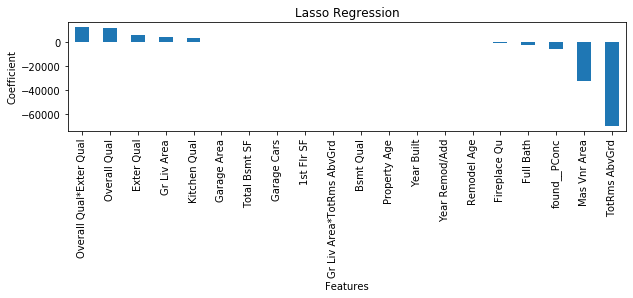

In [178]:

# 6.Plot a graph to see which features are having their variables shrink toward zero.
df=pd.Series(sorted_lassos_coef,index=features).plot.bar(figsize=(10,2))
plt.title('Lasso Regression')
plt.xlabel('Features')
plt.ylabel('Coefficient');


Based on the lasso result, Features that had their variable coefficient being 'zerolized' are:
- Garage Area
- Garage Cars
- Total Bsmt SF
- 1st Flr SF
- Bsmt Qual
- Gr Liv Area*TotRms AbvGrd
- Property Age
- Year Built
- Year Remodel/Add
- Remodel Age  <br>


On the hand, 10 featueres that were still retained are:<br>
- Overall Qual* Exter Qual
- Overall Qual
- Exter Qual
- Gr Liv Area
- Kitchen Qual
- Fireplace Qual
- Full Bath
- found_PConc
- Mas Vnr Area
- TotRms AbvGrd

    
    
    

In [179]:
# 7.obtain residuals 
residuals_lassos=ys_test-pred_lassos

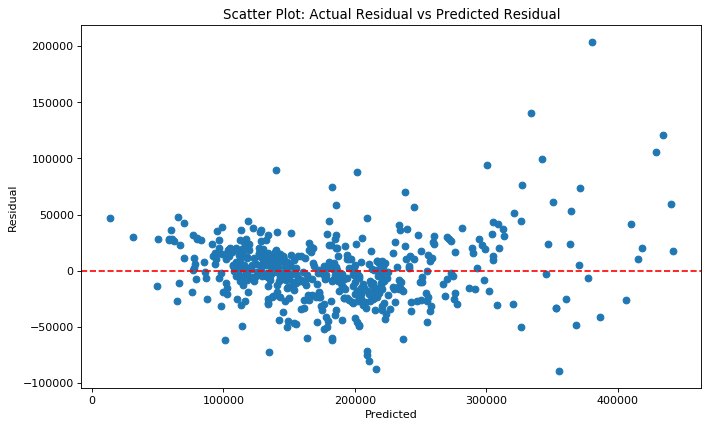

In [180]:
# 8 Plot scatterplot for residual vs prediction.
plt.figure(figsize=(10, 6), dpi=80)
plt.scatter(pred_lassos,residuals_lassos)
plt.title('Scatter Plot: Actual Residual vs Predicted Residual')
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0.5, color='r', linestyle='--')


the distribution of residuals vs predicted is Heteroscedasticity 



The vertical range of the residuals increases as the predicted values increases.<br>
Within predicted saleprice 100k to 300k, the residuals are less variable, and as the predicted sales price increases, the residual plot start to spread out, indicating that the prediction for saleprice above 300k is has high variability and is less precise.<br>

This poses an issue as linear regression assumes that the spread of the residuals is constant across the plot (homoscedasticity). <br>

In [181]:
print('Xs_train shape :',Xs_train.shape)
print('ys_train shape :',ys_train.shape)
print('Xs_test shape :',Xs_test.shape)
print('ys_test shape :',ys_test.shape)

Xs_train shape : (1536, 20)
ys_train shape : (1536,)
Xs_test shape : (512, 20)
ys_test shape : (512,)


In [182]:
# To get Lasso optimal alpha
lassos_optima_alpha=lassos.alpha_
print('Lassos Optima Alpha :',lassos_optima_alpha)

Lassos Optima Alpha : 0.1485


In [183]:
lassos_optima=Lasso(alpha=lassos_optima_alpha)

In [184]:
Lassos_MSE_Train= (-cross_val_score(lassos_optima, Xs_train,ys_train, cv=10, scoring='neg_mean_squared_error').mean())
Lassos_R2_Score_Train=(cross_val_score(lassos_optima, Xs_train,ys_train, cv=10, scoring='r2').mean())
print('Lasso MSE Train :',Lassos_MSE_Train)
print('Lasso RMSE Train :',np.sqrt(Lassos_MSE_Train))
print('Lasso R2 Score Train :',Lassos_R2_Score_Train)

C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 549337787648.0842, tolerance: 800772695.9590346
  positive)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 566880822641.9155, tolerance: 873603527.2141967
  positive)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 575923171525.7737, tolerance: 845305229.066083
  positive)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 58871

Lasso MSE Train : 1158302400.0214438
Lasso RMSE Train : 34033.841981496065
Lasso R2 Score Train : 0.8058448831179635


In [185]:

# cross val scores Spread
cross_val_score(lassos_optima, Xs_train,ys_train, cv=5, scoring='r2')

C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 503218467219.8956, tolerance: 728760592.8309101
  positive)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 544746240103.5954, tolerance: 761369798.2067093
  positive)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 440988540037.6349, tolerance: 767687761.3631316
  positive)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2769

array([0.86151275, 0.86721666, 0.59782477, 0.85519253, 0.85090259])


Comparing the R2 score for X-train (0.8058) with cross validation score spread, the training model is not overfit.

In [186]:
Lassos_MSE_Test= (-cross_val_score(lassos_optima, Xs_test,ys_test, cv=10, scoring='neg_mean_squared_error').mean())
Lassos_R2_Score_Test=(cross_val_score(lassos_optima, Xs_test,ys_test, cv=10, scoring='r2').mean())
print('Lasso MSE Test :',Lassos_MSE_Test)
print('Lasso RMSE Test :',np.sqrt(Lassos_MSE_Test))
print('Lasso R2 Score Test :',Lassos_R2_Score_Test)

C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 150682662525.2141, tolerance: 302986054.2586997
  positive)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 127241289090.33884, tolerance: 295357164.8883861
  positive)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 157012264144.66516, tolerance: 313188270.0896326
  positive)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 15

Lasso MSE Test : 756968238.51131
Lasso RMSE Test : 27513.055782869884
Lasso R2 Score Test : 0.8777860832918574


C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 154191615921.9664, tolerance: 319722759.4614802
  positive)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 142733826234.13907, tolerance: 319997555.2910868
  positive)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 142280694037.12292, tolerance: 308904834.47600085
  positive)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1

Based on the score above, the top features 9.that influences House sale Price are: External Quality, Overall Quality,Interaction of External Quality & Overall Quality, Kitchen Quality,Garage Call, Basment Quality,Property Age, Year remodel/Add, Full Bath, found_pCon, Total Room Above Ground and FirePlace Quality.<br>
Removing features that shows '0'magnitude in lasso regression chart does not imporved the model score.

# Modelling with Selected Model and Selected Features



An Optima Lasso Model is built based on the top 10 features remained after lasso regularization.
<br>

- Overall Qual* Exter Qual
- Overall Qual
- Exter Qual
- Gr Liv Area
- Kitchen Qual
- Fireplace Qual
- Full Bath
- found_PConc
- Mas Vnr Area
- TotRms AbvGrd

In [187]:
# Create our selected features matrix (X) and target vector (y)
features_select=['Overall Qual*Exter Qual','Overall Qual','Exter Qual','Gr Liv Area','Kitchen Qual','Fireplace Qu','Full Bath','found__PConc','Mas Vnr Area','TotRms AbvGrd']
Xss=train_final[features_select]
yss=train_final['SalePrice']

In [188]:
# Train Test Split to Split the data into train and test set
Xss_train,Xss_test,yss_train,yss_test=train_test_split(Xss,yss,random_state=42)

In [189]:
# Scaling
ss=StandardScaler()
Xss_train_ss=ss.fit_transform (Xss_train)
Xss_test_ss=ss.transform (Xss_test)

In [190]:
# 1. Fit Lasso optima model with training data, and evaluate the training and test scores 
lassos_optima.fit(Xss_train,yss_train)

Lasso(alpha=0.1485, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [191]:
# 2. check on X,Y train lasso optima score
lassos_optima_R2score_train=lassos_optima.score(Xss_train,yss_train)
print('R2 Score for lassos_optima Train :',lassos_optima_R2score_train)

R2 Score for lassos_optima Train : 0.810417417334161


In [192]:
# 3. check on X,Y test lasso score
lassos_optima_R2score_test=lassos_optima.score(Xss_test,yss_test)
print('R2 Score for lassos_optima Test :',lassos_optima_R2score_test)

R2 Score for lassos_optima Test : 0.8450388661465223


In [193]:
# 4. Do prediction based on X-Test
pred_lasso_optimas=lassos_optima.predict(Xss_test)

In [194]:
#.5. Check pred agaist Y_test
r2_score(yss_test,pred_lasso_optimas)

0.8450388661465223

|Data |R2 Score |
|------|------|
|lassos Train|0.847862|
|lassos Test|0.871972|
|Test vs Predict|0.871972|

|Data |R2 Score |
|------|------|
|lassos_optima Train|0.810417|
|lassos_optima Test|0.845039|
|Test vs Predict optima|0.845039|

# Apply Model on Test Dataset

In [195]:
# Create our features matrix (X) and target vector (y) for Test Dataset.
X=train_final[features_select]
y=train_final['SalePrice']

X_test=test_final[features_select]

In [196]:
# Scaling
ss=StandardScaler()
X_ss=ss.fit_transform (X)
X_test_ss=ss.fit_transform (X_test)

In [197]:
# Fit
lassos_optima.fit(X,y)

Lasso(alpha=0.1485, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [198]:
#Predict
predicted_price=lassos_optima.predict(X_test)

In [199]:
# check length of predicted price
len(predicted_price)


879

In [200]:
# Preview
predicted_price[:10]

array([147787.98526826, 150263.30313212, 217778.48455049, 103870.98788257,
       167708.5673106 , 101484.67692733, 101541.04957288, 138468.42510724,
       221384.72408913, 142330.88227514])

In [201]:
# Create Submmison df and save as csv
submission2= pd.DataFrame(columns = ['Id', 'SalePrice'])
submission2['Id'] = test_final['Id']
submission2['SalePrice'] = predicted_price

In [202]:
# Check Head
submission2.head()

,Id,SalePrice
0,2658,147787.985268
1,2718,150263.303132
2,2414,217778.484550
3,1989,103870.987883
4,625,167708.567311


In [203]:
# export to csv
#submission2.to_csv('submission2.csv',index=False)

# Conclusion and Recommendations

## conclusions

- Best Model:Lasso Regression 
- Kaggle score: 36617.58 (Private Score), 35227.22 (Public Score)
    - The higher private leaderboard score shows the model predictions do not generalize well to new data.
    - The kaggle score 

- The top 10 features remained after lasso regularization are:
    - Overall Qual* Exter Qual
    - Overall Qual
    - Exter Qual
    - Gr Liv Area
    - Kitchen Qual
    - Fireplace Qual
    - Full Bath
    - found_PConc
    - Mas Vnr Area
    - TotRms AbvGrd

### Limitation
Based on the distribution of residuals vs predicted, property within predicted saleprice 100k to 300k, the residuals are less variable, and as the predicted sales price increases, the residual plot start to spread out, indicating that the prediction for saleprice above 300k is has high variability and is less precise. Thus with this model, the sale price predicted above 300k is deemed not precise and less reliable.

### further exploration
Can try on other advance model or ensamble model to improve model accuracy. Besides that, it is very important to undersatnd data and its respective features especially in this case there's a lot of jargon that require domain knowledge (Property features in Ames is different from property features in Sinagpore) to better handle data with null value. 

